In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [8, 6]

# Convolutional Neural Network (CNN)

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif')

In [3]:
import pandas as pd

# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('data/diabetes.csv')
df

AGE  SEX   BMI      BP   TC    LDL   HDL   TCH     LTG  GLU  DIS
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

### Question?

If your goal is to predict diabetes scores based on other measurements in patients, what type of analysis will you do?

- Regression
- Classification
- Clustering
- Dimensionality reduction

Extract feature and target variables from the dataframe.

In [288]:
X = df.loc[:,'AGE':'GLU']
y = df['DIS']

X.shape, y.shape

((442, 10), (442,))

Split the dataset into training and testing sets.

You'll train your models on the training set and evaluate their error on the testing set.

In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((265, 10), (177, 10), (265,), (177,))

### Exercise
Use simple linear regression to predict diabetes score based on 10 other measures for each of 442 patients.

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train a linear regression model on the training set
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# eval model's test error
lr_test_pred = lr_model.predict(X_test)
lr_test_MSE = mean_squared_error(y_test, lr_test_pred)

# diabetes score prediction for the first patient in the testing set
lr_model.predict(X_test[:1])

array([97.61320682])

### Exercise key
Use simple linear regression to predict diabetes score based on 10 other measures for each of 442 patients.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train a linear regression model on the training set
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# eval model's test error
lr_test_pred = lr_model.predict(X_test)
lr_test_MSE = mean_squared_error(y_test, lr_test_pred)

# diabetes score prediction for the first patient in the testing set
lr_model.predict(X_test[:1])

array([97.61320682])

Visualize the regression.

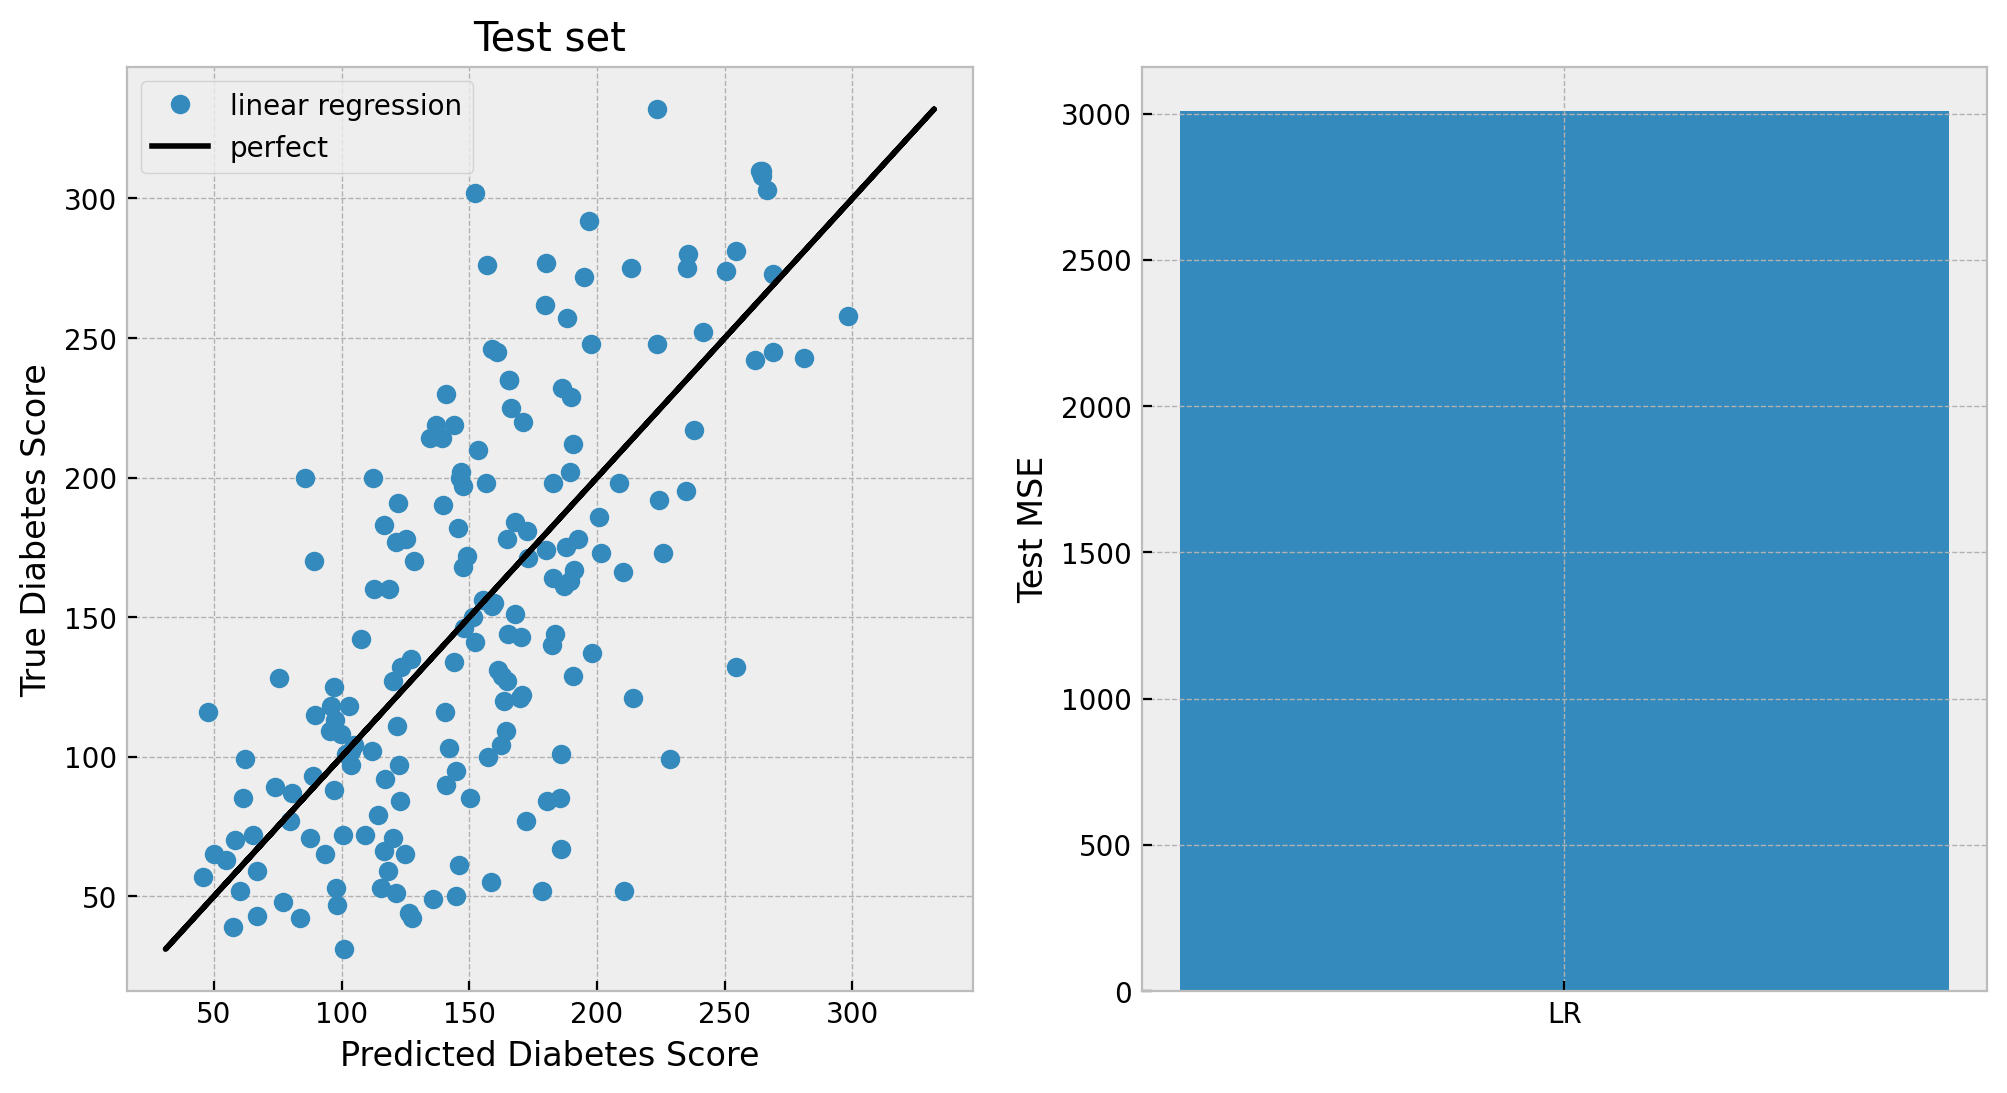

In [174]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR'], [lr_test_MSE])
plt.ylabel('Test MSE');

Now let's use a neural network for this regression.

[sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [290]:
# multi layer perceptron regressor
from sklearn.neural_network import MLPRegressor

# neural network
#   1 hidden layer of 100 neurons
#   1 output layer for regression of a single target variable
net_1x100 = MLPRegressor(hidden_layer_sizes=[100], random_state=1, max_iter=1000)

# train model on the training set
net_1x100.fit(X_train, y_train)

# eval model's test error
net_1x100_test_pred = net_1x100.predict(X_test)
net_1x100_test_MSE = mean_squared_error(y_test, net_1x100_test_pred)

# diabetes score prediction for the first patient in the testing set
net_1x100.predict(X_test[:1])

array([104.18836831])

Visualize the training of the neural network.

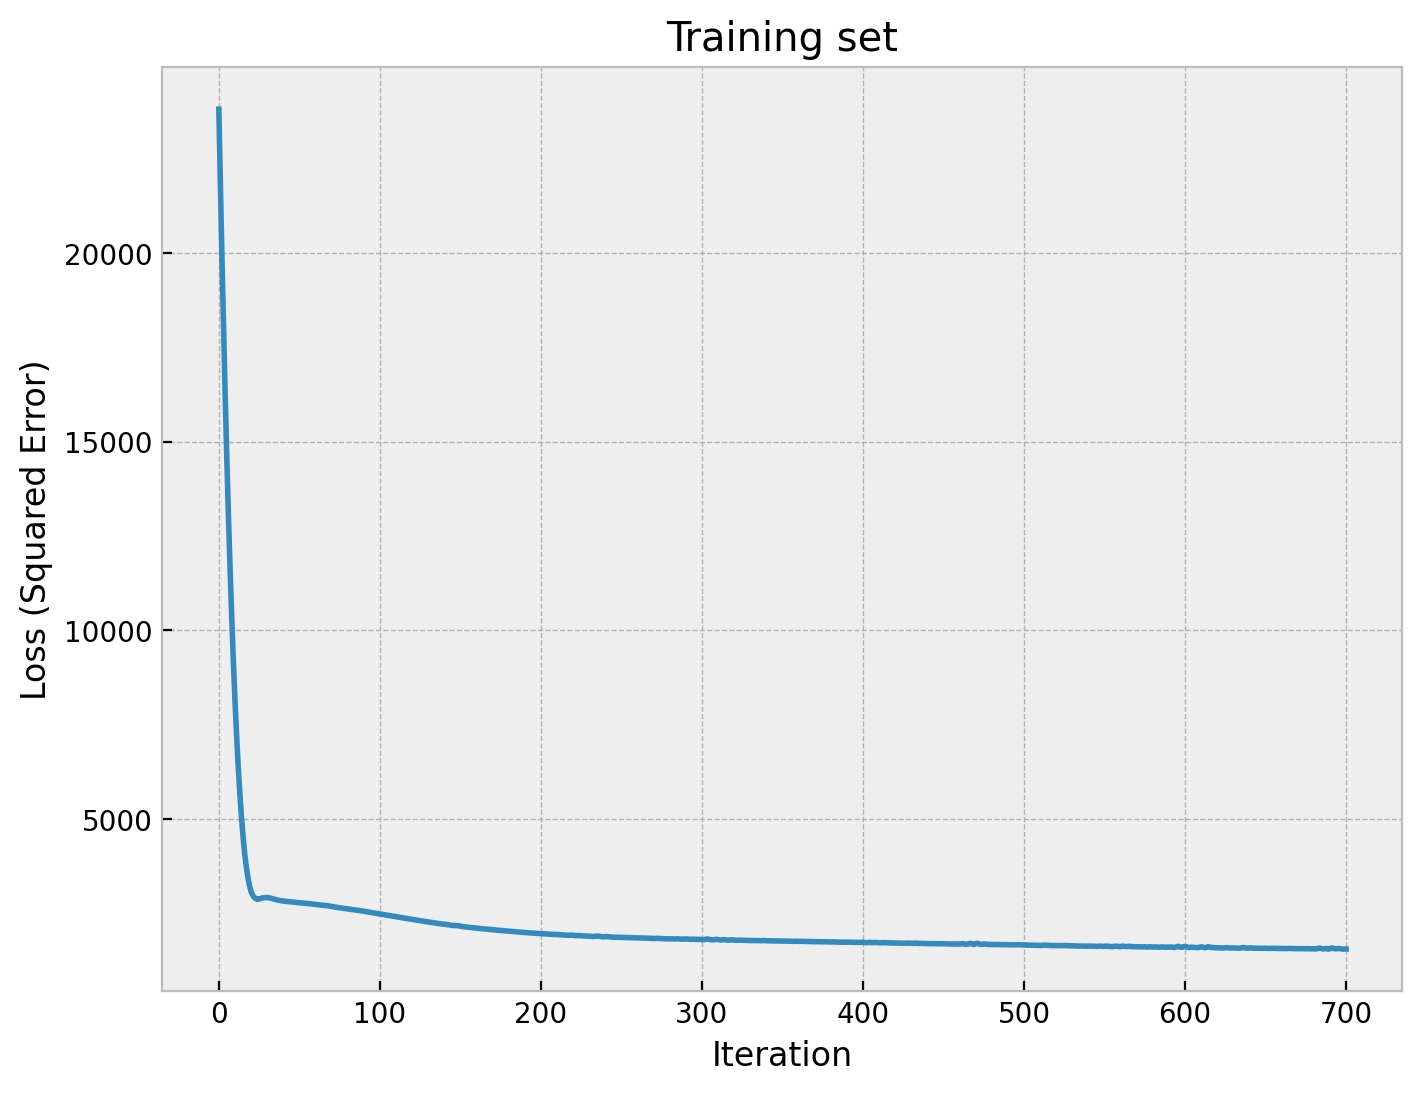

In [295]:
plt.plot(net_1x100.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss (Squared Error)')
plt.title('Training set');

Visualize the regression.

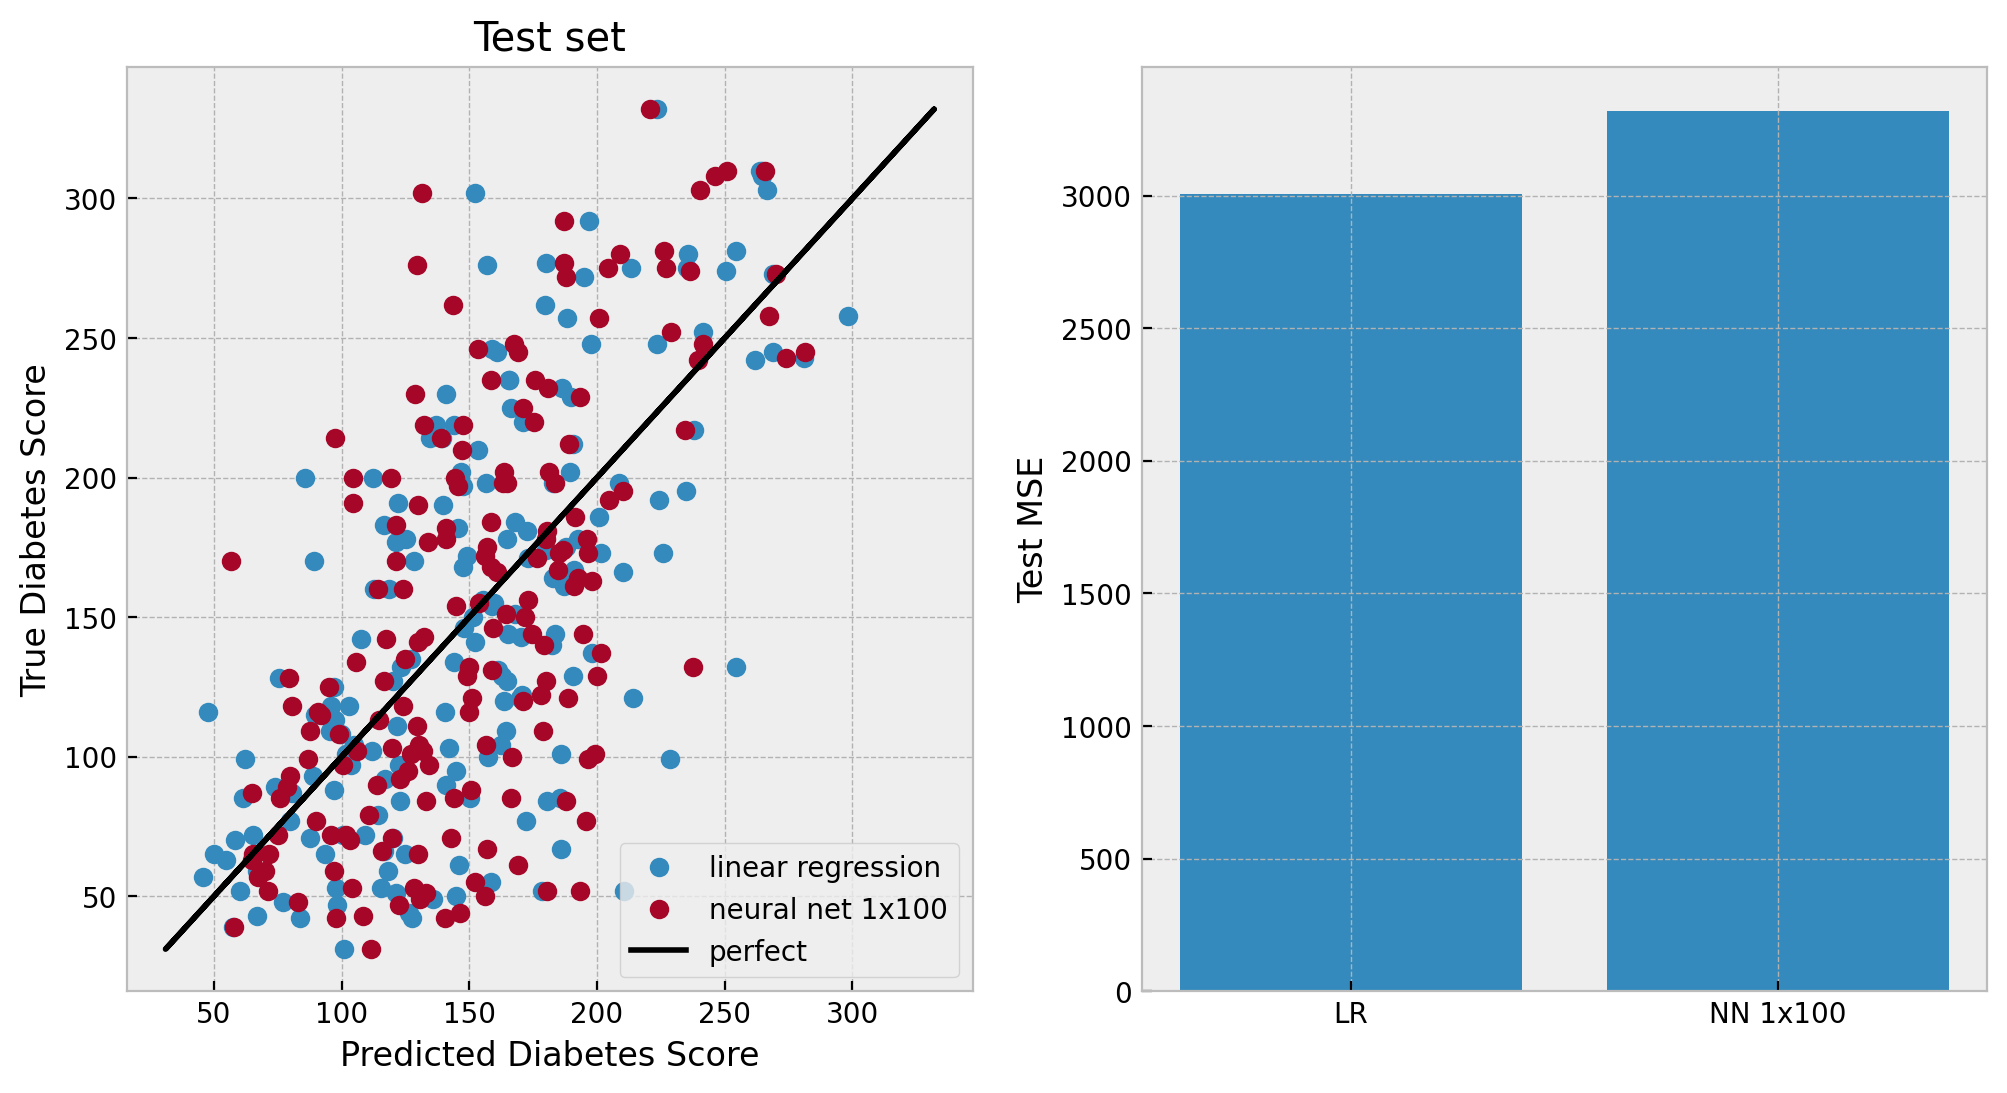

In [223]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_1x100_test_pred, y_test, 'o', label='neural net 1x100')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100'], [lr_test_MSE, net_1x100_test_MSE])
plt.ylabel('Test MSE');

Let's compare the training and testing errors for both models.

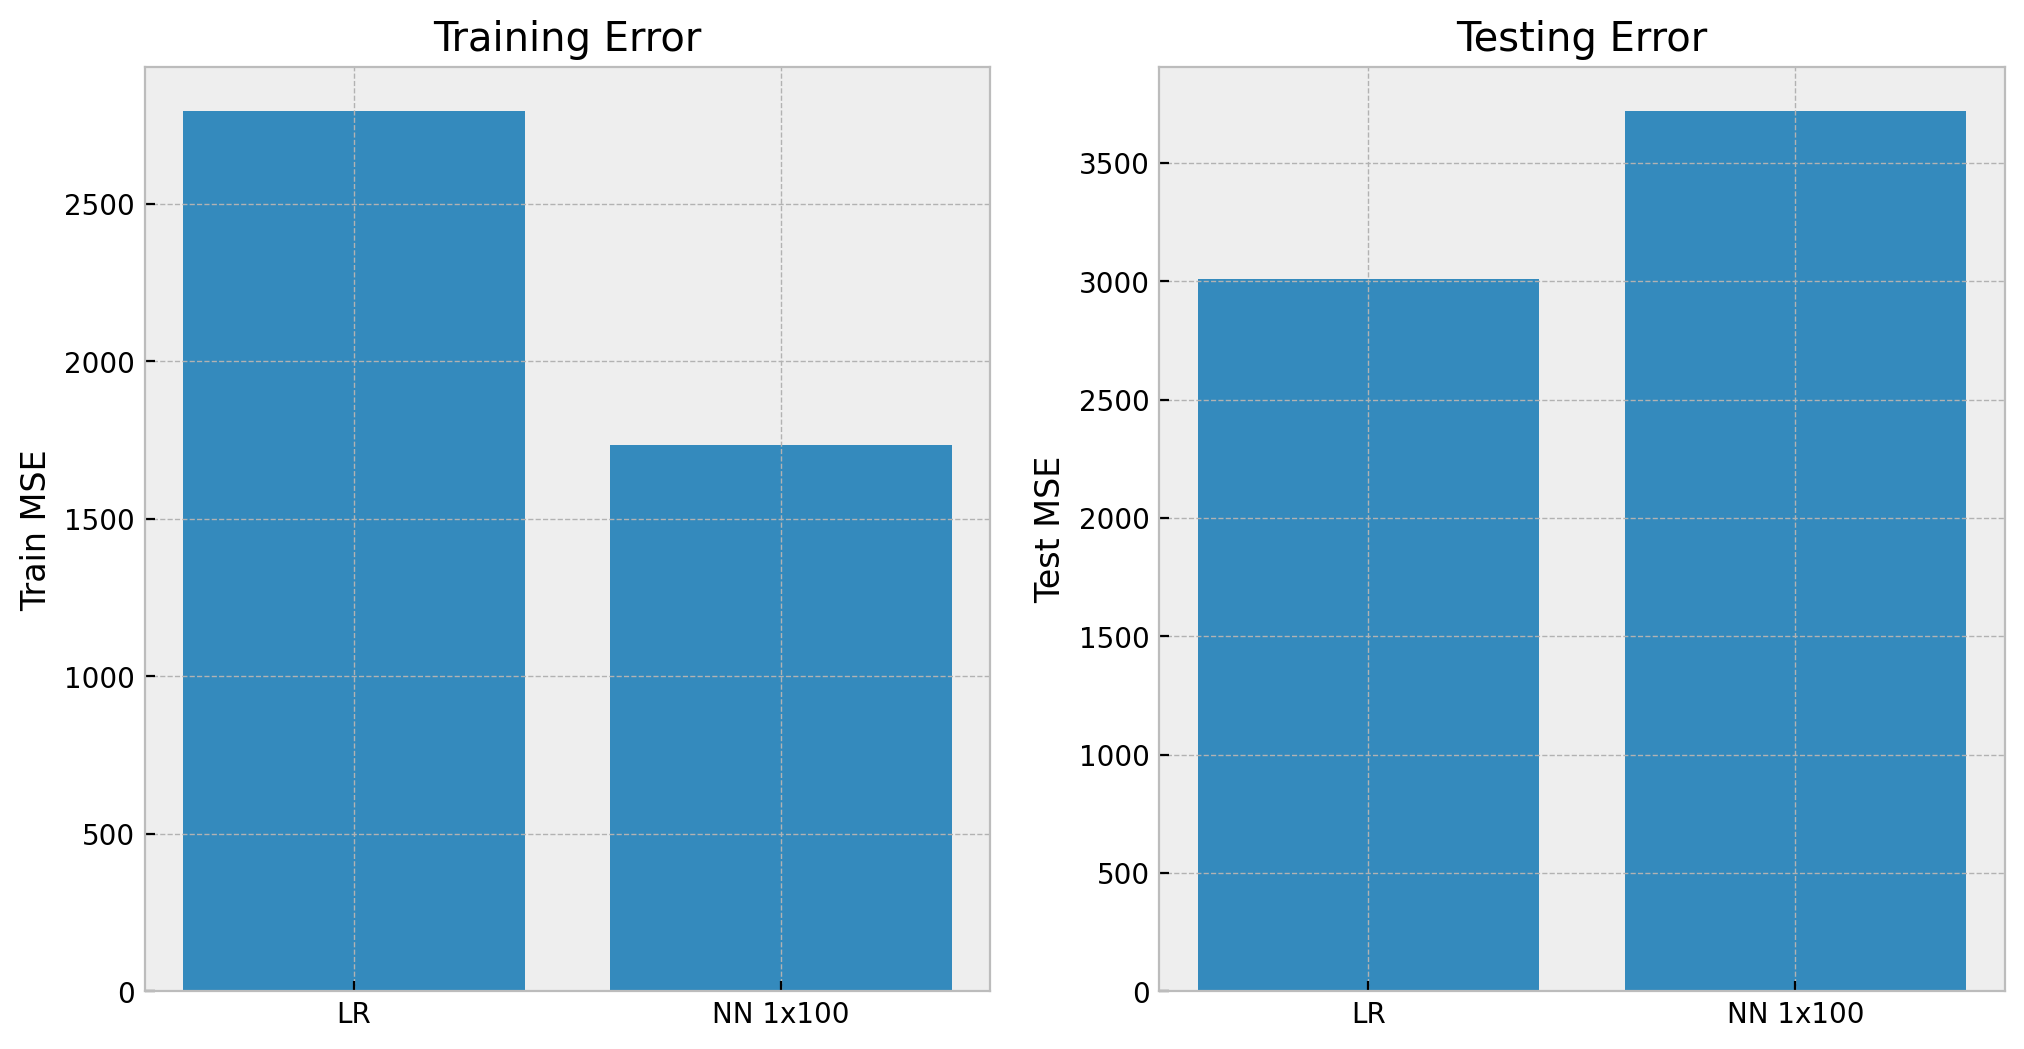

In [101]:
lr_train_pred = lr_model.predict(X_train)
lr_train_MSE = mean_squared_error(y_train, lr_train_pred)

net_1x100_train_pred = net.predict(X_train)
net_1x100_train_MSE = mean_squared_error(y_train, net_1x100_train_pred)

plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.bar(['LR', 'NN 1x100'], [lr_train_MSE, net_1x100_train_MSE])
plt.ylabel('Train MSE')
plt.title('Training Error');

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100'], [lr_test_MSE, net_1x100_test_MSE])
plt.ylabel('Test MSE')
plt.title('Testing Error');

What can you conlucde about the neural network in relation to the simple linear regression?

### Exercise
Use a neural network with a single hidden layer of 5,000 neurons to predict diabetes score based on 10 other measures for each of 442 patients.

In [77]:
# neural network
#   1 hidden layer of 5000 neurons
#   1 output layer for regression of a single target variable
net_1x5000 = MLPRegressor(hidden_layer_sizes=[5000])

# train model on the training set
net_1x5000.fit(X_train, y_train)

# eval model's test error
net_1x5000_test_pred = net_1x5000.predict(X_test)
net_1x5000_test_MSE = mean_squared_error(y_test, net_1x5000_test_pred)

### Exercise key
Use a neural network with a single hidden layer of 5,000 neurons to predict diabetes score based on 10 other measures for each of 442 patients.

In [77]:
# neural network
#   1 hidden layer of 5000 neurons
#   1 output layer for regression of a single target variable
net_1x5000 = MLPRegressor(hidden_layer_sizes=[5000], random_state=1, max_iter=10000)

# train model on the training set
net_1x5000.fit(X_train, y_train)

# eval model's test error
net_1x5000_test_pred = net_1x5000.predict(X_test)
net_1x5000_test_MSE = mean_squared_error(y_test, net_1x5000_test_pred)

Visualize the regression.

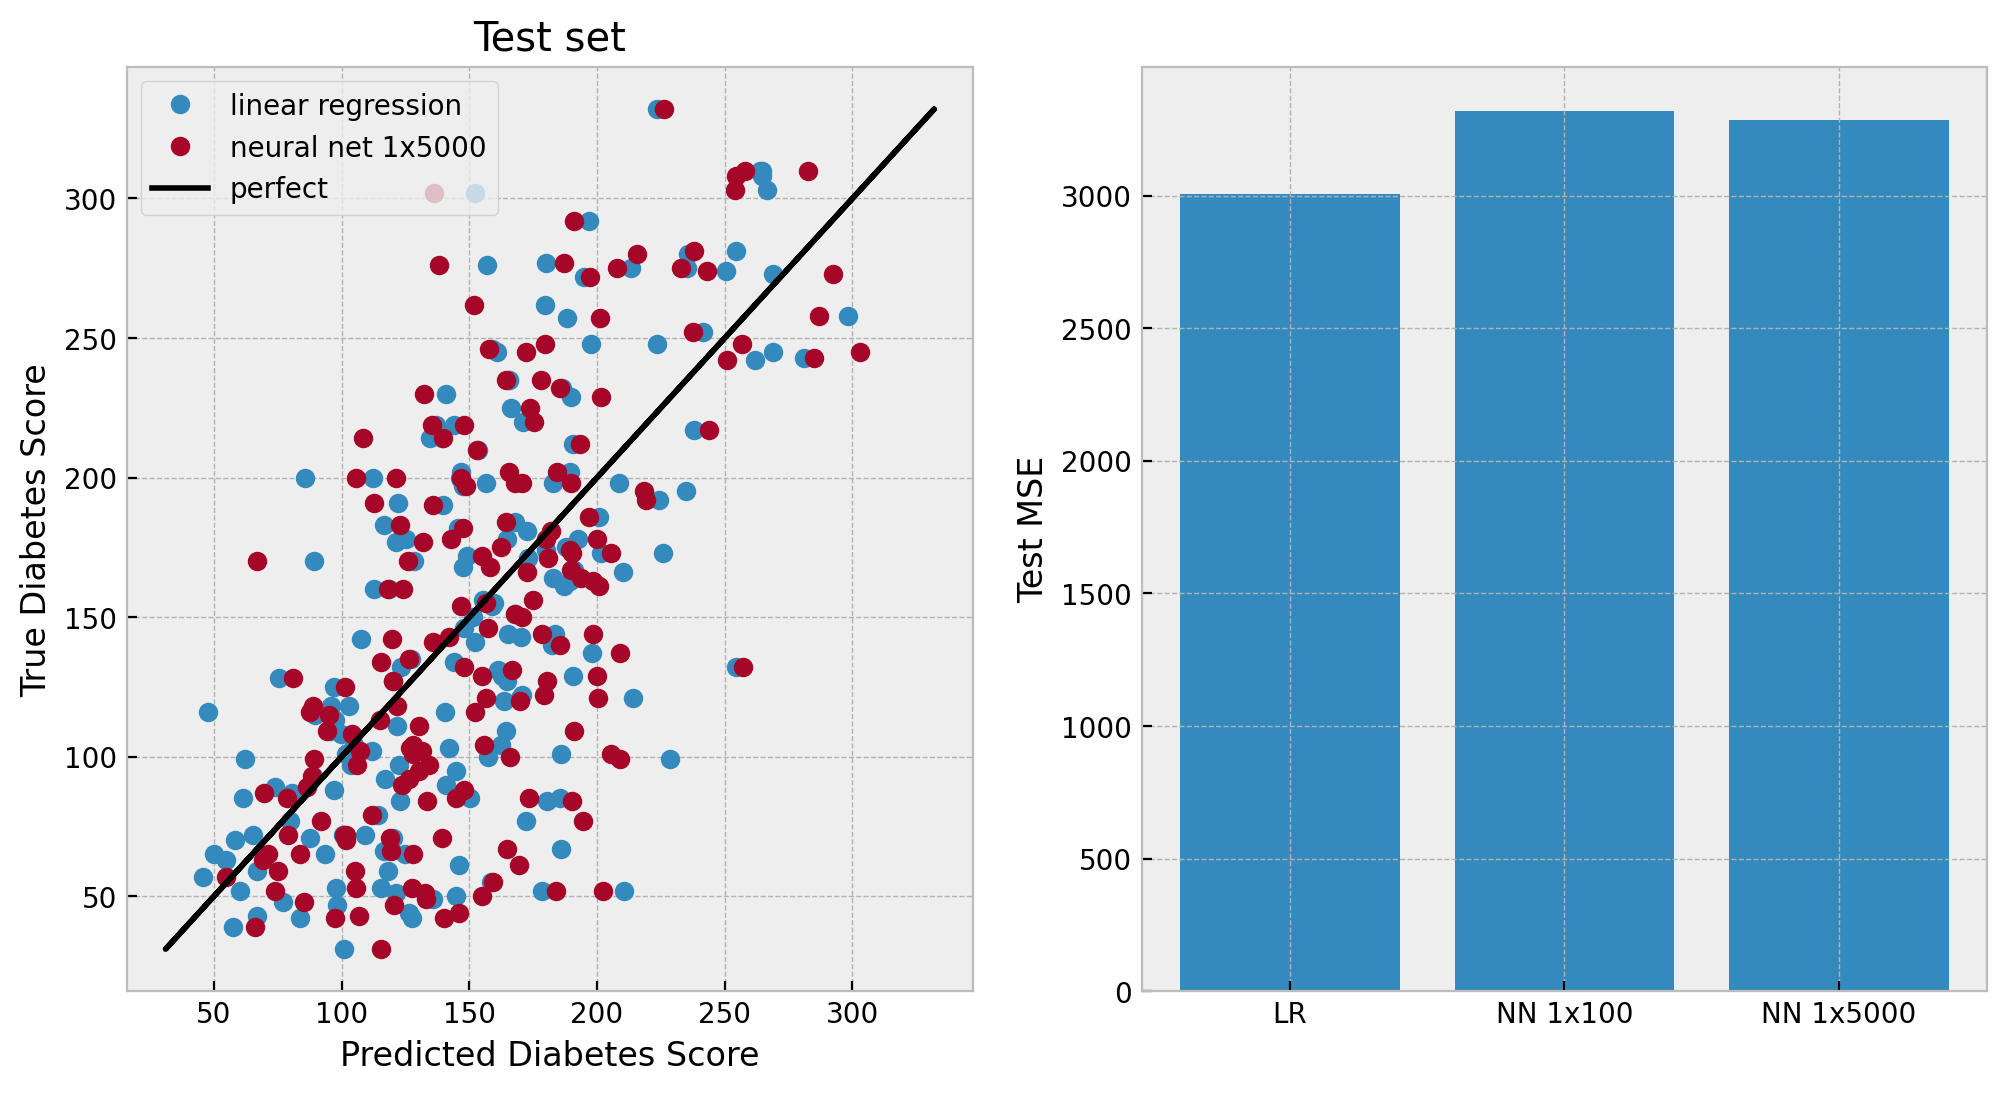

In [176]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_1x5000_test_pred, y_test, 'o', label='neural net 1x5000')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', 'NN 1x100', 'NN 1x5000'], [lr_test_MSE, net_1x100_test_MSE, net_1x5000_test_MSE])
plt.ylabel('Test MSE');

What if we add more layers?

In [79]:
# neural network
#   5 hidden layers of 30 neurons each
#   1 output layer for regression of a single target variable
net_5x30 = MLPRegressor(hidden_layer_sizes=[30, 30, 30, 30, 30], random_state=1, max_iter=10000)

# train model on the training set
net_5x30.fit(X_train, y_train)

# eval model's test error
net_5x30_test_pred = net_5x30.predict(X_test)
net_5x30_test_MSE = mean_squared_error(y_test, net_5x30_test_pred)

Visualize the regression.

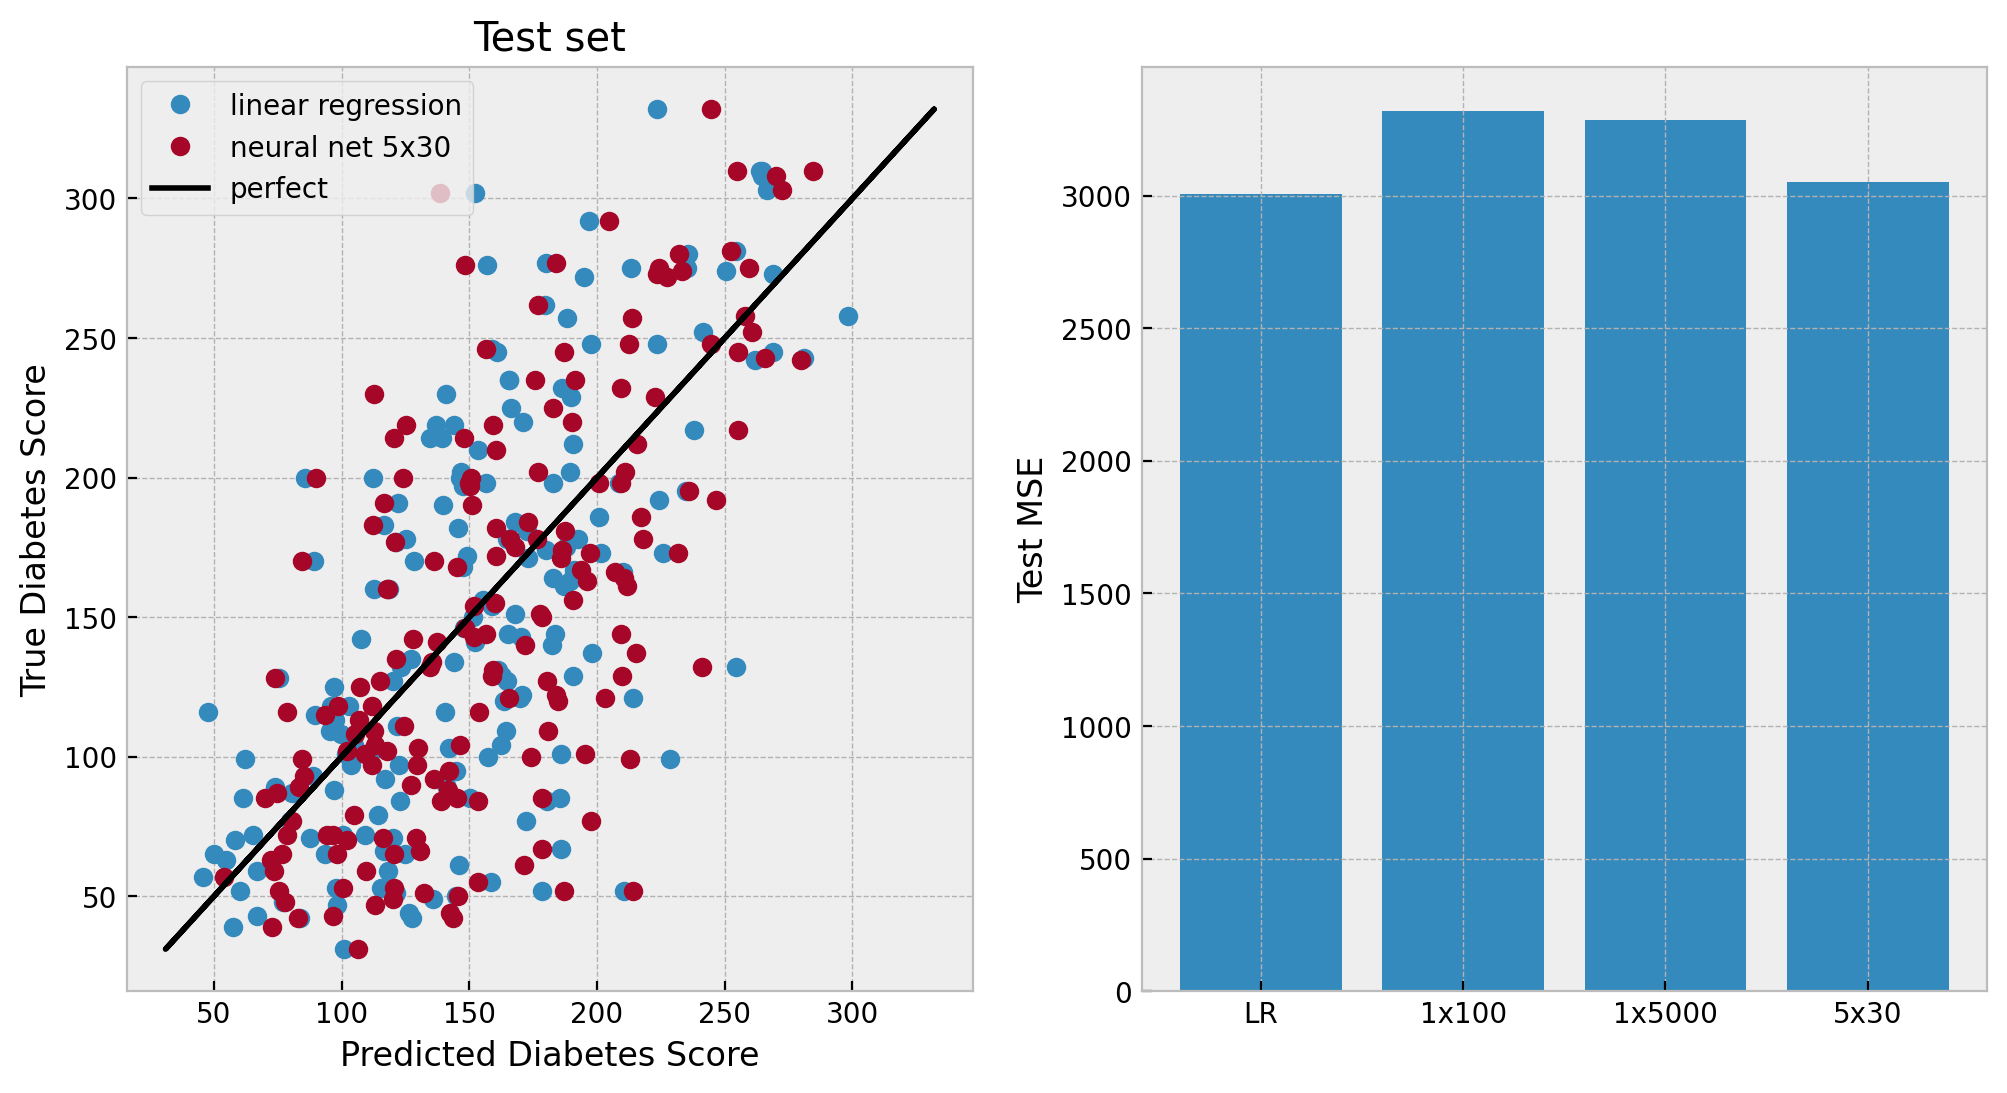

In [177]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_5x30_test_pred, y_test, 'o', label='neural net 5x30')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x5000', '5x30'], [lr_test_MSE, net_1x100_test_MSE, net_1x5000_test_MSE, net_5x30_test_MSE])
plt.ylabel('Test MSE');

What if we add even more layers and neurons?

In [84]:
# neural network
#   10 hidden layers of 1000 neurons each
#   1 output layer for regression of a single target variable
net_10x1000 = MLPRegressor(hidden_layer_sizes=[1000]*10, random_state=1, max_iter=10000)

# train model on the training set
net_10x1000.fit(X_train, y_train)

# eval model's test error
net_10x1000_test_pred = net_10x1000.predict(X_test)
net_10x1000_test_MSE = mean_squared_error(y_test, net_10x1000_test_pred)

Visualize the regression.

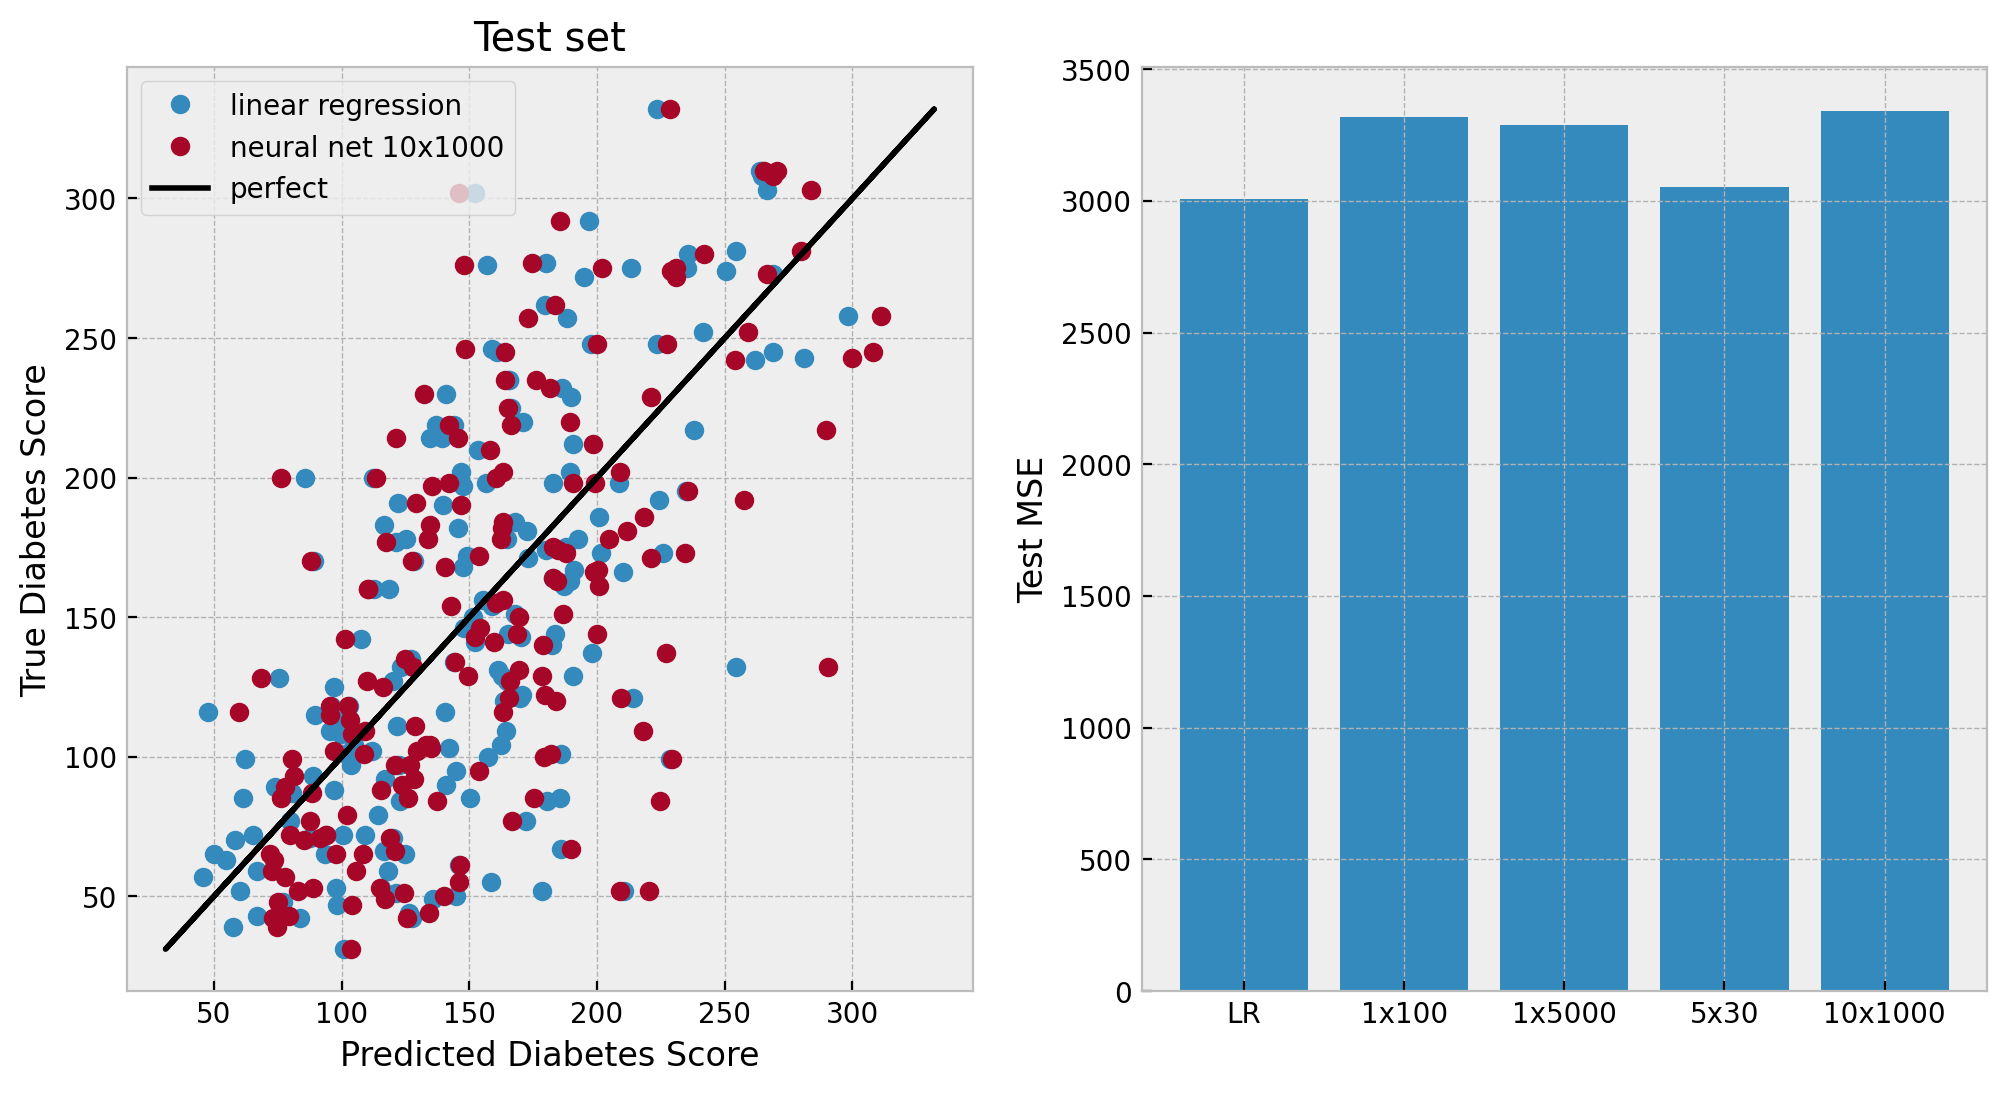

In [178]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lr_test_pred, y_test, 'o', label='linear regression')
plt.plot(net_10x1000_test_pred, y_test, 'o', label='neural net 10x1000')
plt.plot(y_test, y_test, 'k-', label='perfect')
plt.xlabel('Predicted Diabetes Score')
plt.ylabel('True Diabetes Score')
plt.title('Test set')
plt.legend();

plt.subplot(1, 2, 2)
plt.bar(['LR', '1x100', '1x5000', '5x30', '10x1000'], 
        [lr_test_MSE, net_1x100_test_MSE, net_1x5000_test_MSE, net_5x30_test_MSE, net_10x1000_test_MSE])
plt.ylabel('Test MSE');

# Mouse V1 activity in response to gratings of varying orientation

Mouse V1 data from Stringer et al. (2019)
https://www.biorxiv.org/content/10.1101/679324v2.abstract

![](images/grating-mouse.png)

These data comprise time-averaged responses of ~20,000 neurons to ~4,000 stimulus gratings of different orientations from 0-360 degrees, recorded through Calcium imaging. The responses have been normalized by spontaneous levels of activity and then z-scored over stimuli, so expect negative numbers. They have also been binned and averaged to each degree of orientation.

Example from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W2D1_DeepLearning/student/W2D1_Tutorial1.html)

Calcium imaging measures of activity from 23,589 neurons in V1 in response to vieweing a grating pattern rotated from 0-360 degrees.

![](images/grating-orientations.png)

In [4]:
neural_responses = np.load('data/neural_responses.npy')
grating_orientations = np.load('data/grating_orientations.npy')

neural_responses.shape, grating_orientations.shape

((360, 23589), (360,))

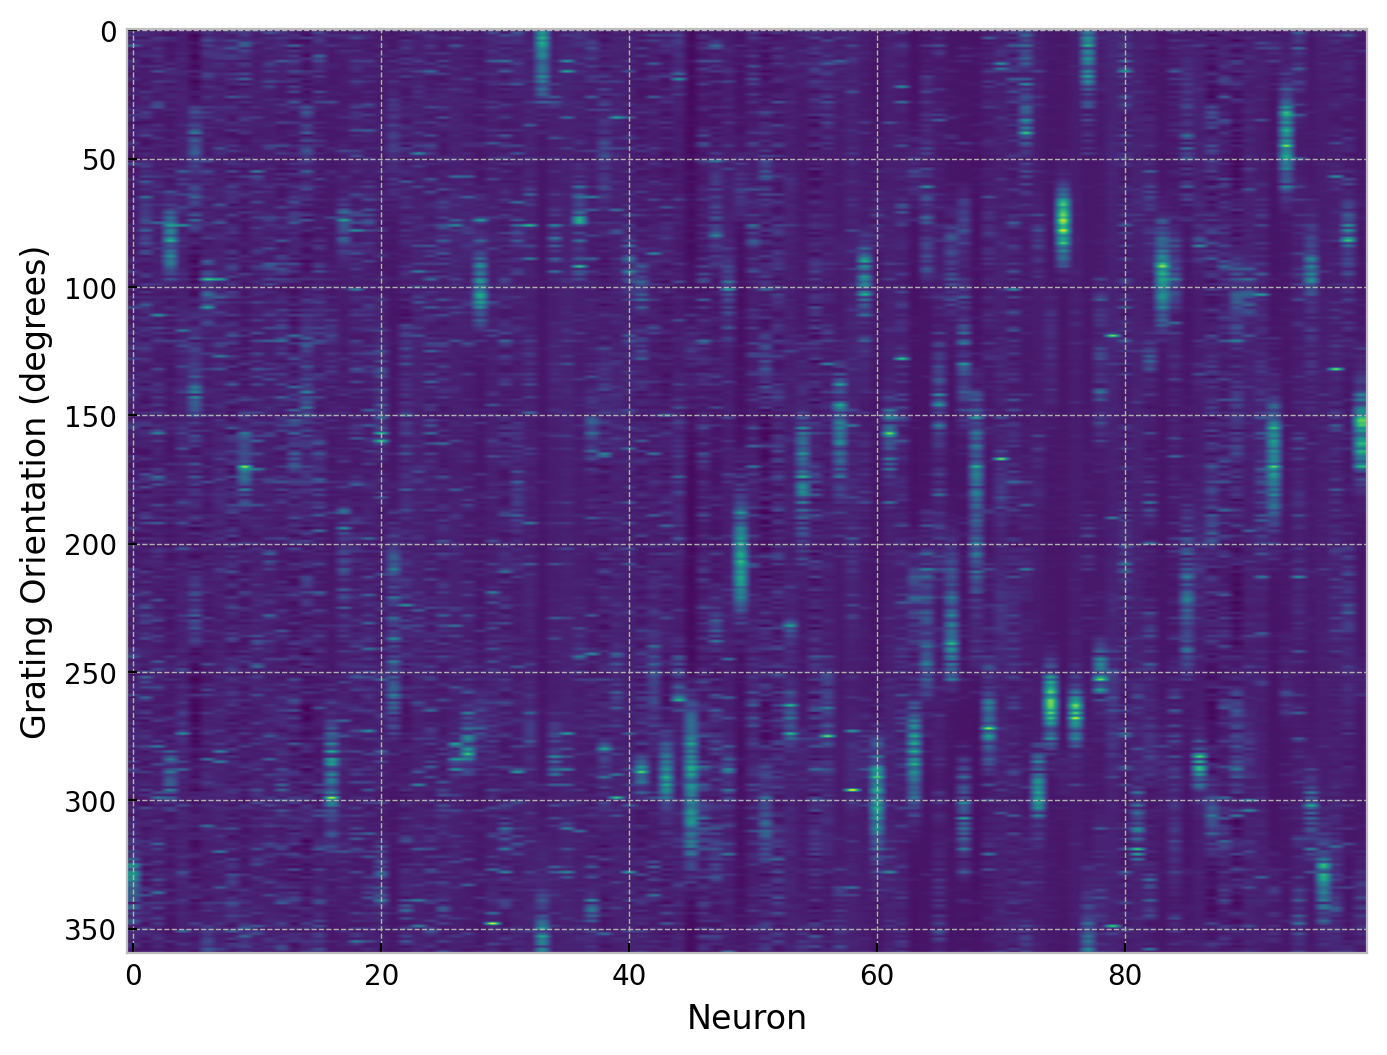

In [6]:
plt.imshow(neural_responses[:,:100], aspect='auto')
plt.xlabel('Neuron')
plt.ylabel('Grating Orientation (degrees)');

Instead of predicting the grating orientation based on the mouse's neural activity, let's see if we can determine the grating orientation based on the grating images themselves.

For simplicity, here we will only construct a neural network to determine whether or not an image of agrating is tilted to the left or right, but it should be fairly straightforward to predict the actual grating angle if you wanted.

First, let's make some images of gratings.

In [97]:
# adapted from https://compneuro.neuromatch.io/tutorials/W2D1_DeepLearning/student/W2D1_Tutorial2.html#helper-functions
def make_grating(angle, sf=1 / 28, res=0.1, patch=False):
    """Generate oriented grating stimulus

    Args:
    angle (float): orientation of grating (angle from vertical), in degrees
    sf (float): controls spatial frequency of the grating
    res (float): resolution of image. Smaller values will make the image
      smaller in terms of pixels. res=1.0 corresponds to 640 x 480 pixels.
    patch (boolean): set to True to make the grating a localized
      patch on the left side of the image. If False, then the
      grating occupies the full image.

    Returns:
    torch.Tensor: (res * 480) x (res * 640) pixel oriented grating image

    """

    angle = np.deg2rad(angle)  # transform to radians

    wpix, hpix = 640, 480  # width and height of image in pixels for res=1.0

    xx, yy = np.meshgrid(sf * np.arange(0, wpix * res) / res, sf * np.arange(0, hpix * res) / res)

    if patch:
        gratings = np.cos(xx * np.cos(angle + .1) + yy * np.sin(angle + .1))  # phase shift to make it better fit within patch
        gratings[gratings < 0] = 0
        gratings[gratings > 0] = 1
        xcent = gratings.shape[1] * .75
        ycent = gratings.shape[0] / 2
        xxc, yyc = np.meshgrid(np.arange(0, gratings.shape[1]), np.arange(0, gratings.shape[0]))
        icirc = ((xxc - xcent) ** 2 + (yyc - ycent) ** 2) ** 0.5 < wpix / 3 / 2 * res
        gratings[~icirc] = 0.5
    else:
        gratings = np.cos(xx * np.cos(angle) + yy * np.sin(angle))
        gratings[gratings < 0] = 0
        gratings[gratings > 0] = 1

    gratings -= 0.5

    # Return torch tensor
    return torch.tensor(gratings, dtype=torch.float32)

For visualization, let's just create a handful of gratings at a few angles and then view them.

In [98]:
orientations = [0, 22.5, 45, 67.5, 90]

stimuli = torch.zeros((len(orientations), 1, 48, 64), dtype=torch.float32)

for i, ori in enumerate(orientations):
    stimuli[i,0,:,:] = make_grating(ori)

stimuli.shape

torch.Size([5, 1, 48, 64])

Visualize our handful of sample grating images...

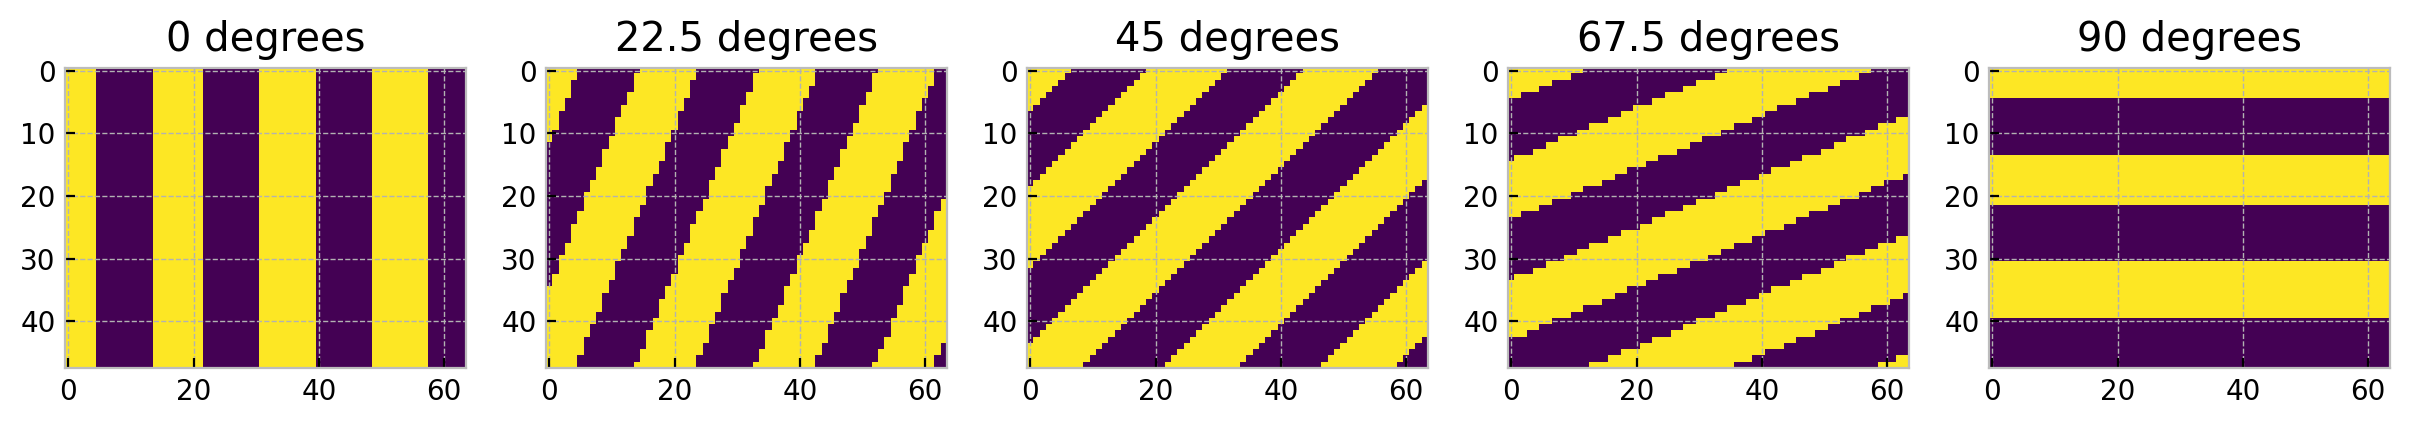

In [99]:
plt.figure(figsize=[15,5])
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(stimuli[i,0,:,:])
    plt.title(f'{orientations[i]} degrees')

Now that you get the idea, let's make a grating for each of 360 degree rotations.

In [100]:
orientations = np.arange(360)

stimuli = torch.zeros((len(orientations), 1, 48, 64), dtype=torch.float32)

for i, ori in enumerate(orientations):
    stimuli[i,0,:,:] = make_grating(ori)

stimuli.shape

torch.Size([360, 1, 48, 64])

We're going to implement a convolutional neural network to determine the grating left/right tilt.

We will use convolution kernels that have some relation to receptive fields in visual cortex.

Le't make 6 filters mimicking various receptive fields.

In [105]:
# adapted from https://compneuro.neuromatch.io/tutorials/W2D1_DeepLearning/student/W2D1_Tutorial2.html#helper-functions
def make_filters(out_channels=6, K=7):
    """ make example filters, some center-surround and gabors
    Returns:
      filters: out_channels x K x K
    """
    grid = np.linspace(-K/2, K/2, K).astype(np.float32)
    xx,yy = np.meshgrid(grid, grid, indexing='ij')

    # create center-surround filters
    sigma = 1.1
    gaussian = np.exp(-(xx**2 + yy**2)**0.5/(2*sigma**2))
    wide_gaussian = np.exp(-(xx**2 + yy**2)**0.5/(2*(sigma*2)**2))
    center_surround = gaussian - 0.5 * wide_gaussian

    # create gabor filters
    thetas = np.linspace(0, 180, out_channels-2+1)[:-1] * np.pi/180
    gabors = np.zeros((len(thetas), K, K), np.float32)
    lam = 10
    phi = np.pi/2
    gaussian = np.exp(-(xx**2 + yy**2)**0.5/(2*(sigma*0.4)**2))
    for i,theta in enumerate(thetas):
        x = xx*np.cos(theta) + yy*np.sin(theta)
        gabors[i] = gaussian * np.cos(2*np.pi*x/lam + phi)

    filters = np.concatenate((center_surround[np.newaxis,:,:],
                            -1*center_surround[np.newaxis,:,:],
                            gabors),
                           axis=0)
    filters /= np.abs(filters).max(axis=(1,2))[:,np.newaxis,np.newaxis]
    filters -= filters.mean(axis=(1,2))[:,np.newaxis,np.newaxis]
    # convert to torch
    filters = torch.tensor(filters, dtype=torch.float32)
    # add channel axis
    filters = filters.unsqueeze(1)

    return filters

Make the filter kernels.

In [106]:
filters = make_filters(out_channels=6, K=7)

filters.shape

torch.Size([6, 1, 7, 7])

Visualize the filter kernels.

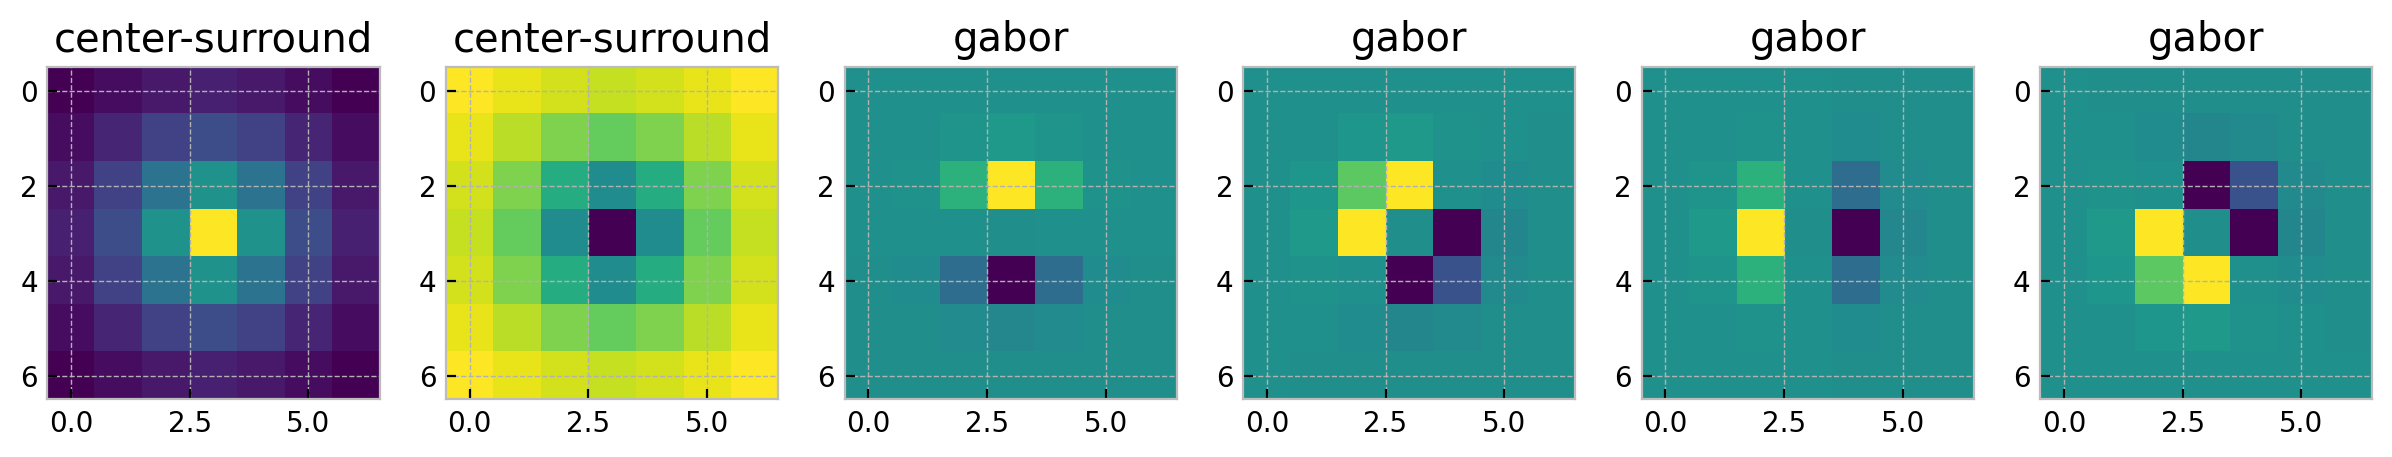

In [107]:
plt.figure(figsize=[15,4])
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(filters[i,0,:,:])
    if i < 2:
        plt.title('center-surround')
    else:
        plt.title('gabor')

Now let's try a convolutional neural network something like this...

![](images/conv-fc-net.png)

In [108]:
class GratingTiltNet(nn.Module):
    
    def __init__(self):
        nn.Module.__init__(self)
        
        # convolutional layer
        # add padding to ensure that each channel has same dimensionality as input
        self.conv = nn.Conv2d(1, 6, kernel_size=7, padding=3)
        
        # init convolutional kernels to center-surround and gabor filters
        self.conv.weight = nn.Parameter(filters)
        self.conv.bias = nn.Parameter(torch.zeros((6,), dtype=torch.float32))
        
        # fully connected layer with 10 neurons
        self.fc = nn.Linear(6 * 48 * 64, 10)
        
        # output layer with single neuron (will decide left or right tilt)
        self.out = nn.Linear(10, 1)

    def forward(self, images_in):
        # images_in:  n_stimuli x 1  x h x w
        # images_out: n_stimuli x 6 x h x w
        images_out = self.conv(images_in)
        
        # each row of X is the flattened output from the convolutional layer
        # for one stimulus image
        X = images_out.reshape(-1, 6 * 48 * 64)
        
        # length 10 output of fully connected layer
        X = torch.relu(self.fc(X))
        
        # network output with sigmoid for binary choice
        y = torch.sigmoid(self.out(X))
        
        return y

Initial untrained left vs. right tilt predictions.

In [109]:
net = GratingTiltNet()
prediction = net(stimuli)
prediction.shape

torch.Size([360, 1])

In [110]:
prediction[:9]

tensor([[0.5042],
        [0.5118],
        [0.5066],
        [0.5165],
        [0.5470],
        [0.4972],
        [0.5312],
        [0.5273],
        [0.5261]], grad_fn=<SliceBackward0>)

In [111]:
choice = prediction.detach().numpy() >= 0.5

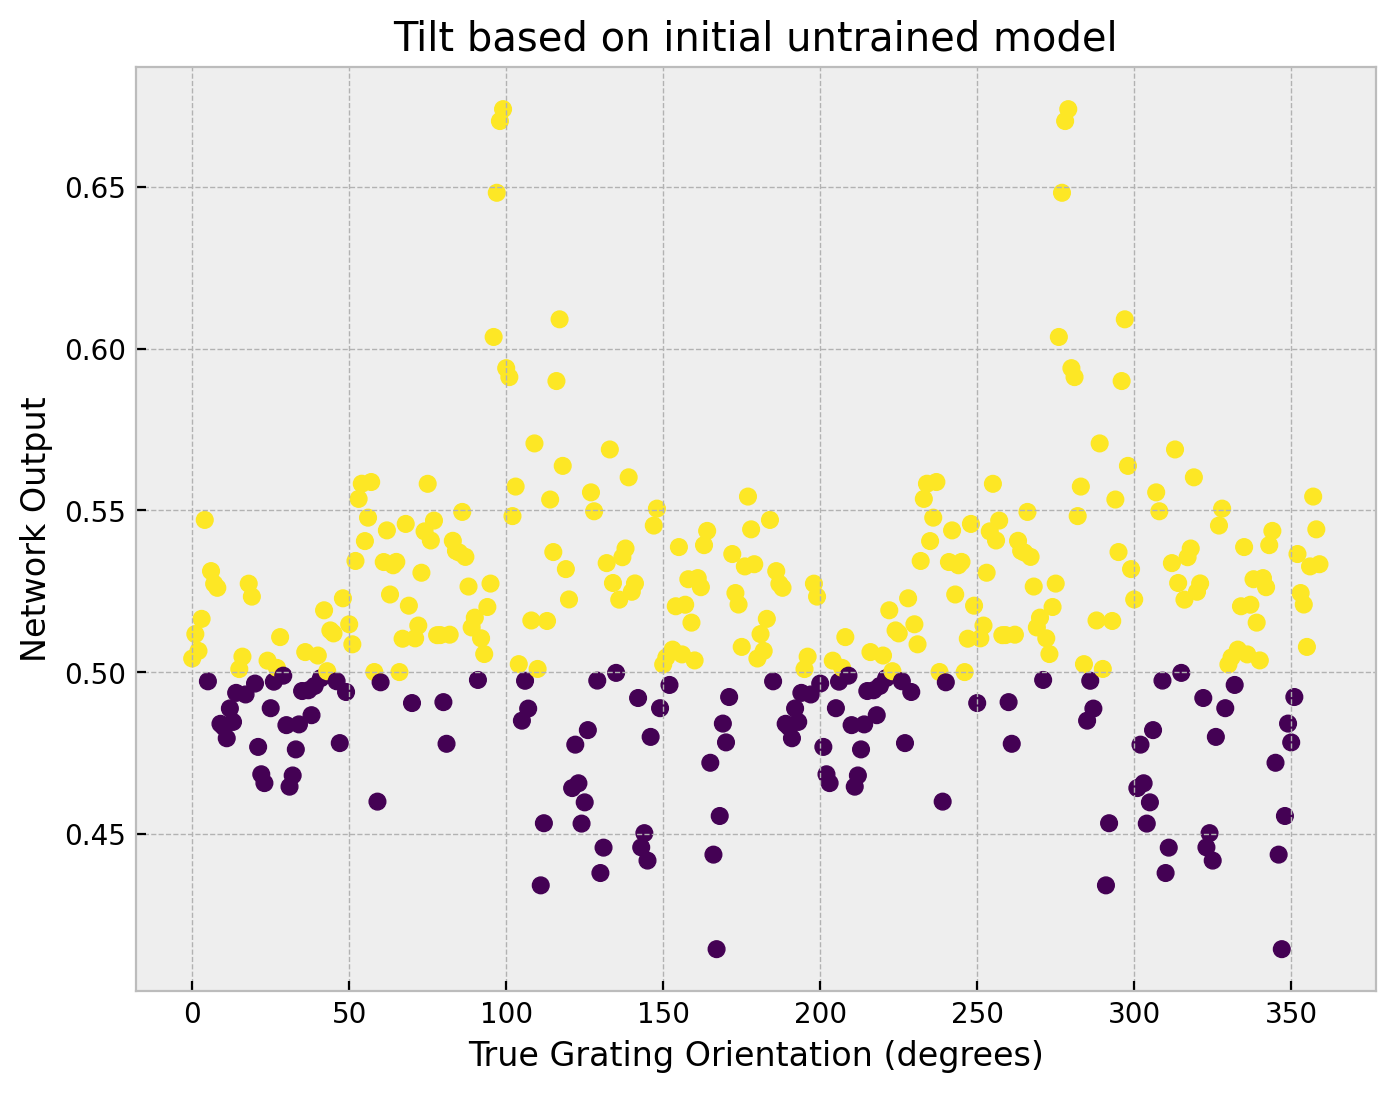

In [112]:
plt.scatter(range(360), prediction.detach().numpy(), c=choice)
plt.xlabel('True Grating Orientation (degrees)')
plt.ylabel('Network Output')
plt.title('Tilt based on initial untrained model');

Now let's train the model.

In [53]:
def train(X, y, model, loss_fn, optimizer):
    # Put the model into training mode.
    model.train()

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    # Computes gradient of loss and updates model parameters
    # to reduce loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Return loss so we can keep track of it
    # .item() extracts float value from single-valued tensor
    return loss.item()

In [54]:
def test(X, y, model, loss_fn):
    # Put the model into evaluation mode.
    model.eval()

    # Do NOT compute unecessary gradients during evaluation.
    with torch.no_grad():
        pred = model(X)
        loss = loss_fn(pred, y)

    # Return loss so we can keep track of it
    # .item() extracts float value from single-valued tensor
    return loss.item()

Convert true output to range [0,1] as appropriate for sigmoidal output from network.

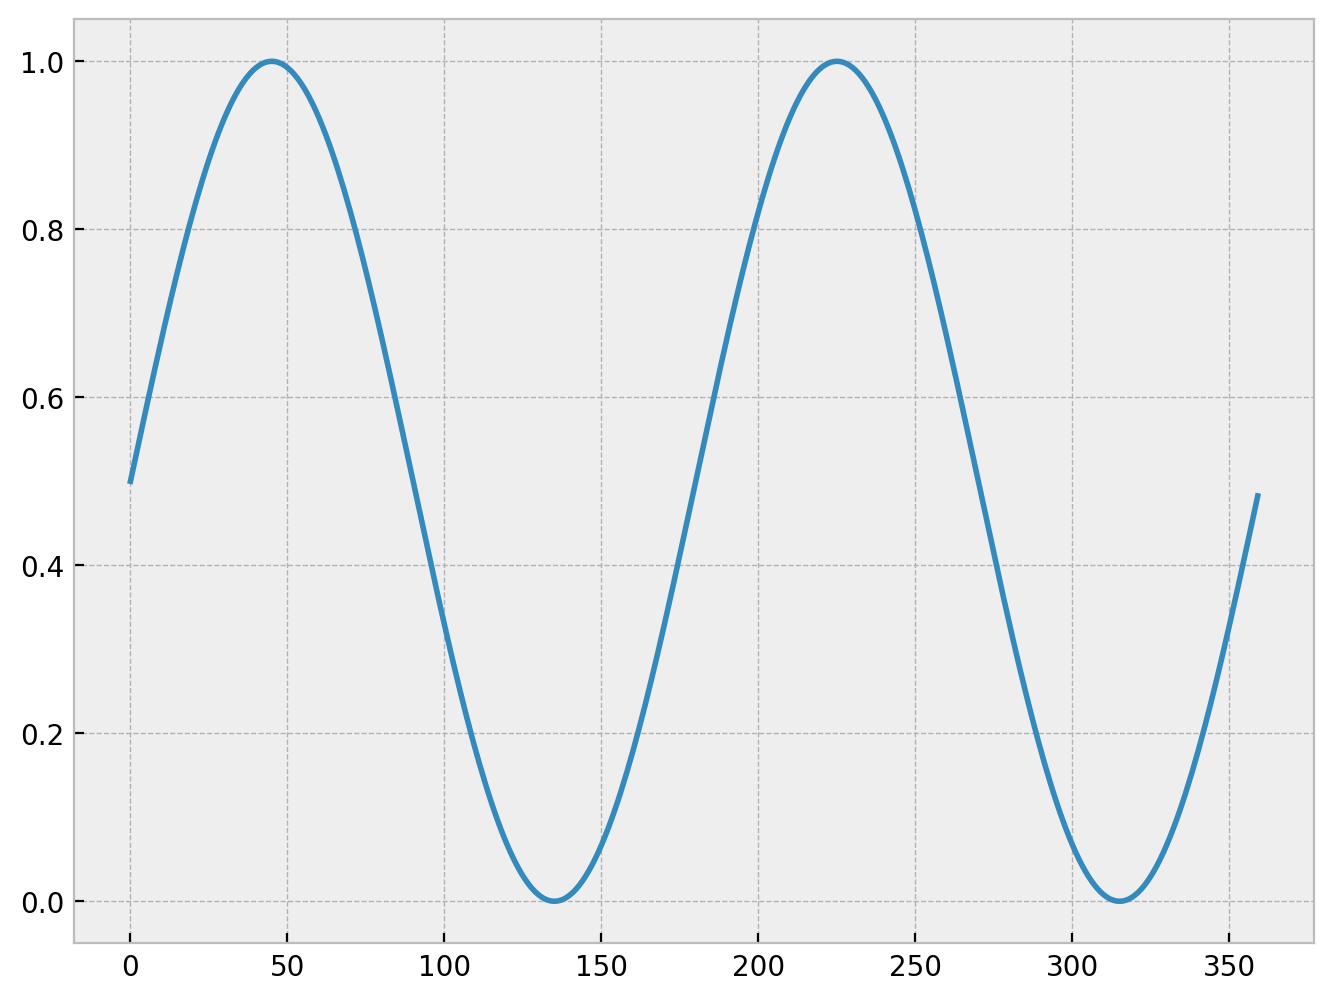

In [123]:
orientations = np.arange(360)

y = np.sin(orientations * np.pi / 180 * 2)
y = y / 2 + 0.5

plt.plot(np.arange(360), y);

Split the data into training and testing sets.

In [124]:
from sklearn.model_selection import train_test_split

X = stimuli
y = torch.tensor(y, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.4, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([216, 1, 48, 64]),
 torch.Size([144, 1, 48, 64]),
 torch.Size([216]),
 torch.Size([144]))

In [125]:
y_train = y_train.reshape([-1,1])
y_test = y_test.reshape([-1,1])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([216, 1, 48, 64]),
 torch.Size([144, 1, 48, 64]),
 torch.Size([216, 1]),
 torch.Size([144, 1]))

In [126]:
model = GratingTiltNet()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [127]:
epochs = 100
train_loss = []
test_loss = []

for t in range(epochs):
    loss = train(X_train, y_train, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test(X_test, y_test, model, loss_fn)
    test_loss.append(loss)

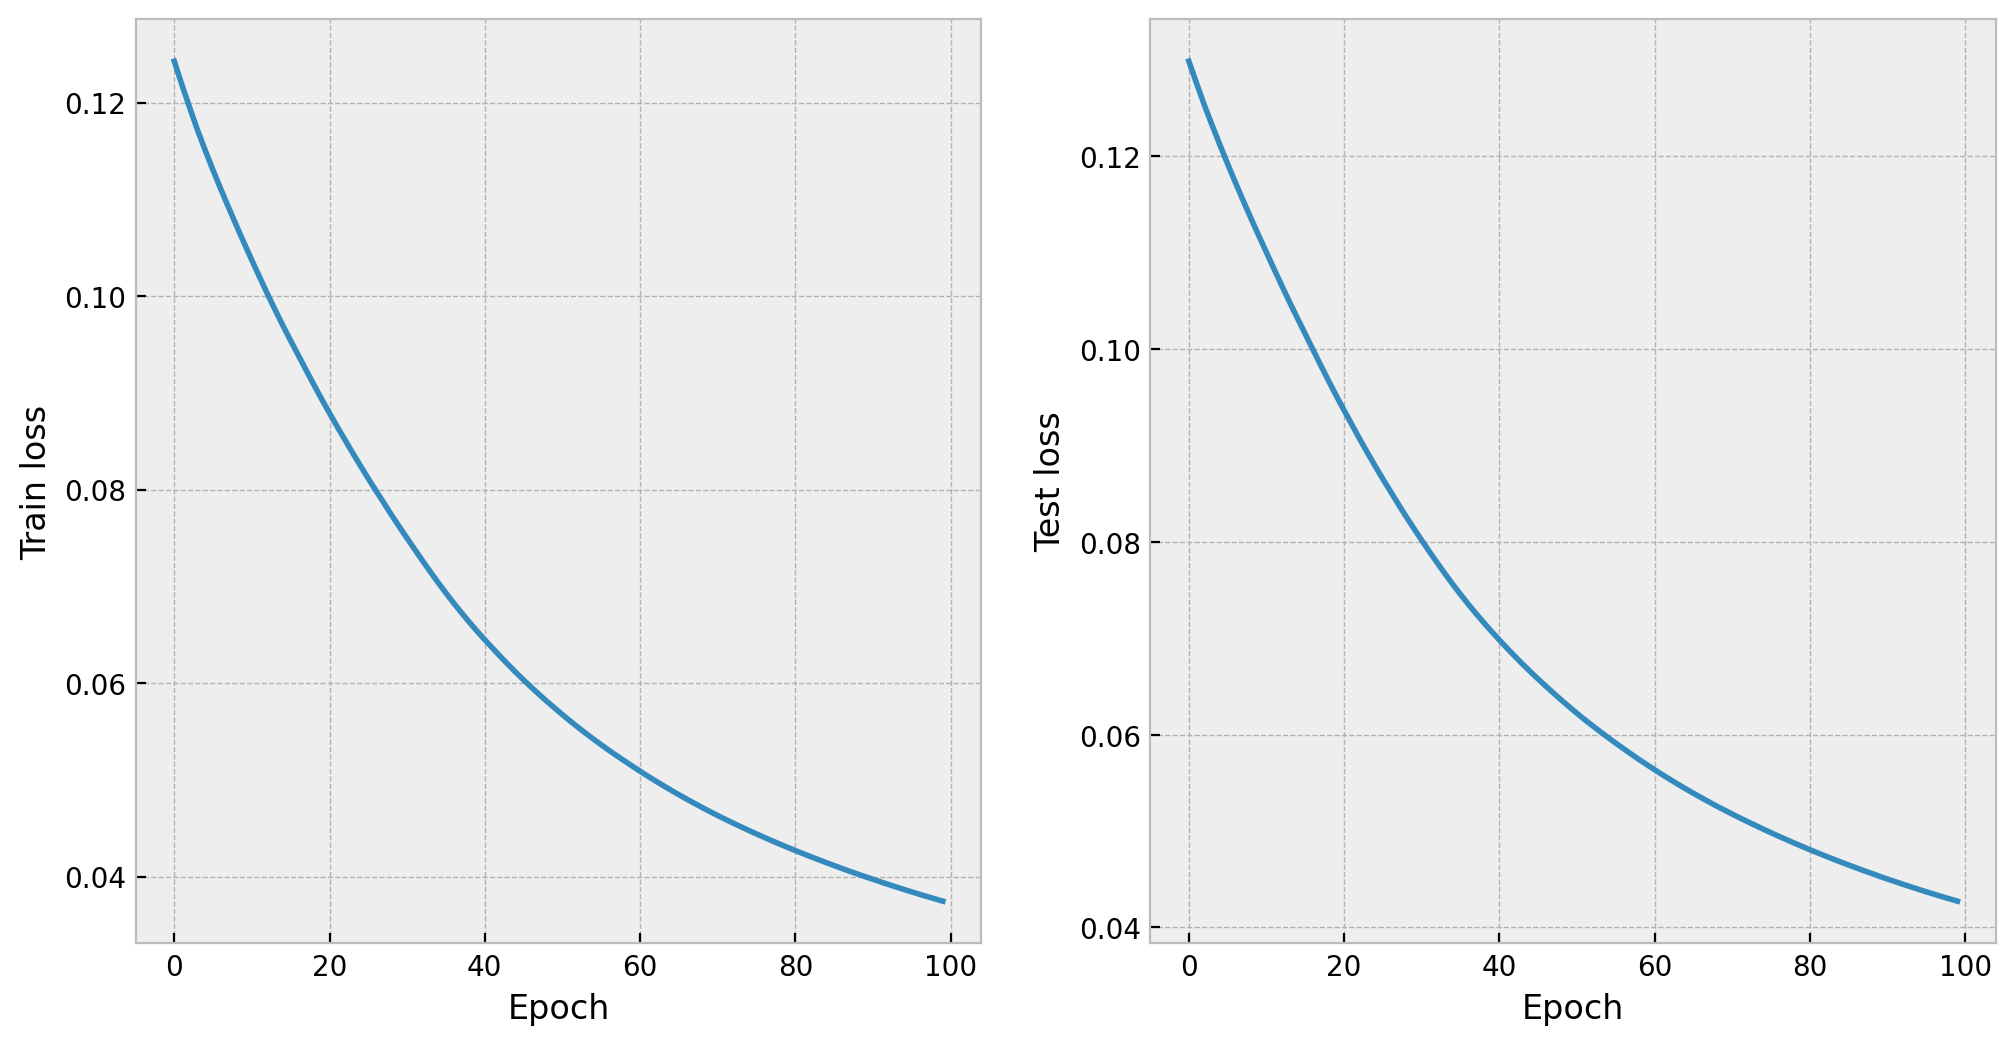

In [128]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

Keep training...

In [129]:
epochs = 300

for t in range(epochs):
    loss = train(X_train, y_train, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test(X_test, y_test, model, loss_fn)
    test_loss.append(loss)

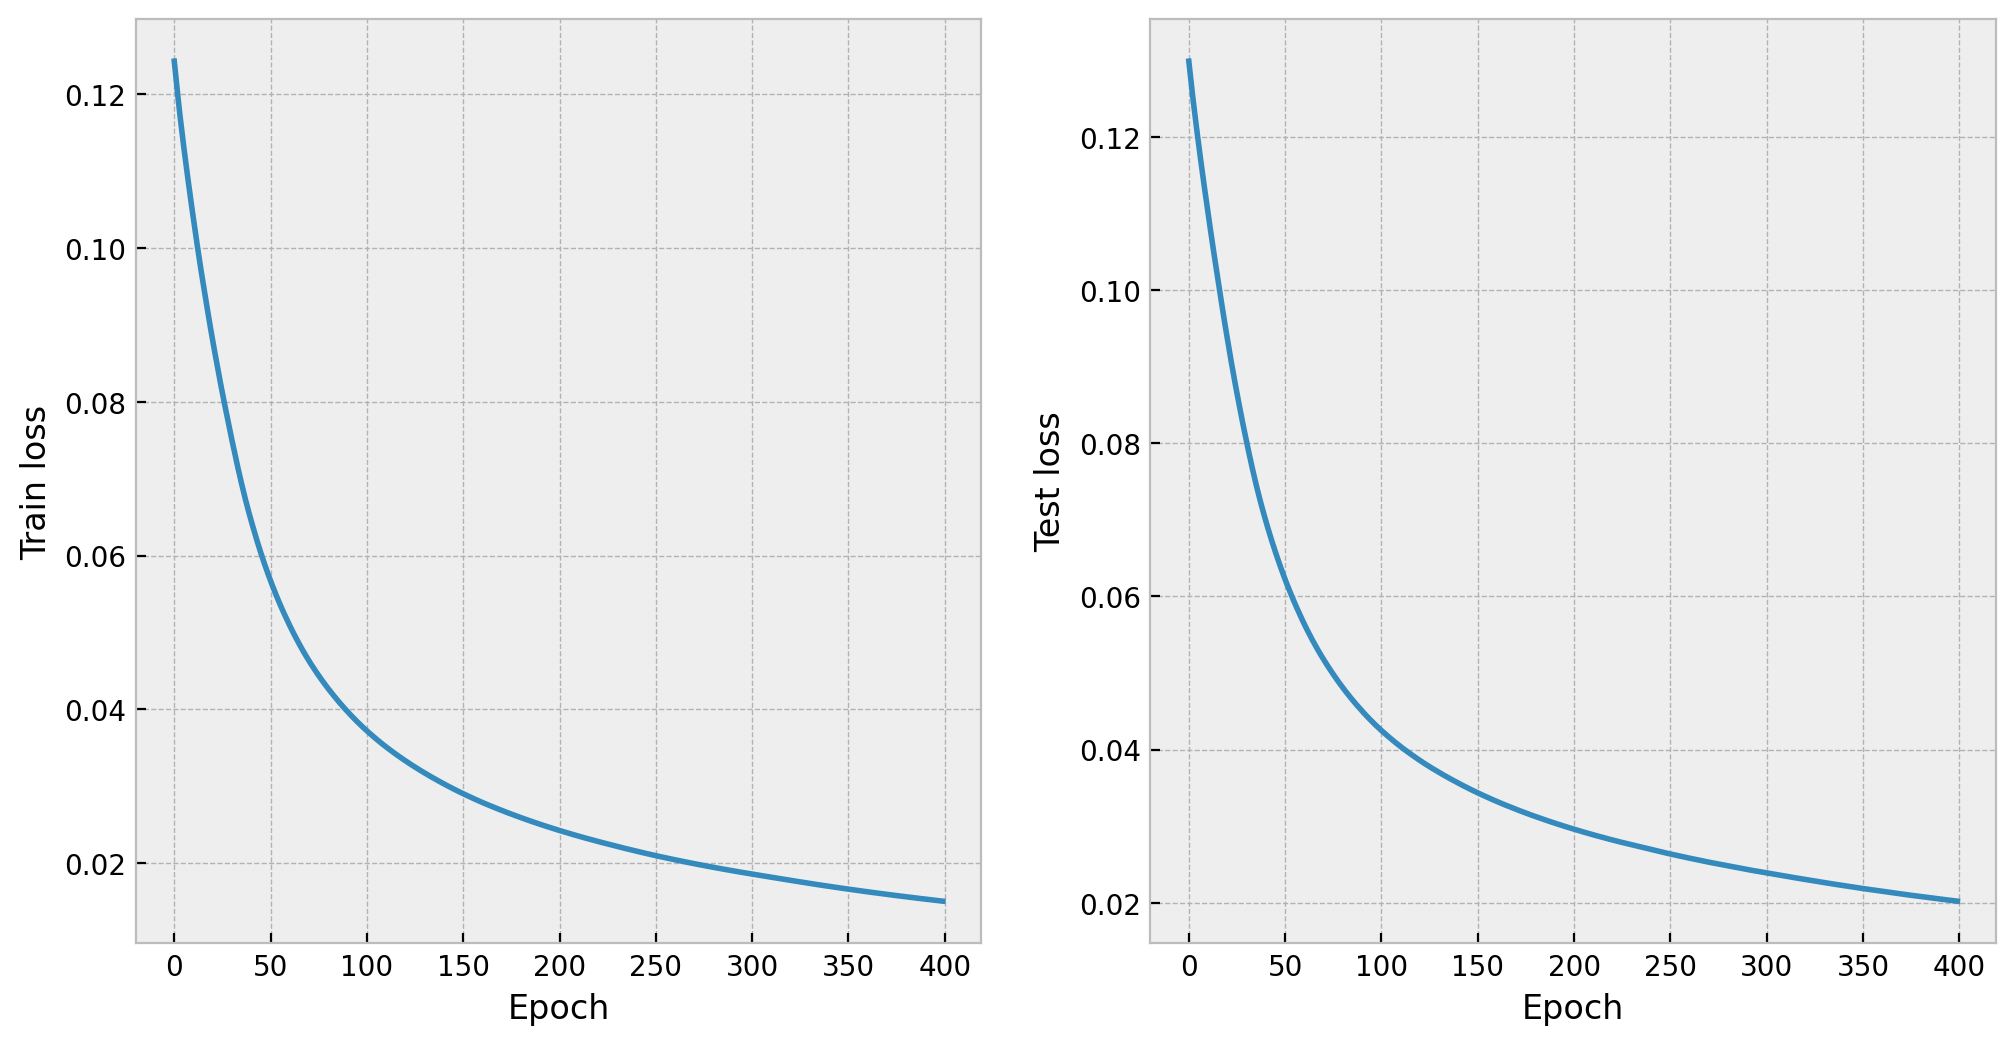

In [130]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

Keep training...

In [135]:
epochs = 1600

for t in range(epochs):
    loss = train(X_train, y_train, model, loss_fn, optimizer)
    train_loss.append(loss)
    
    loss = test(X_test, y_test, model, loss_fn)
    test_loss.append(loss)

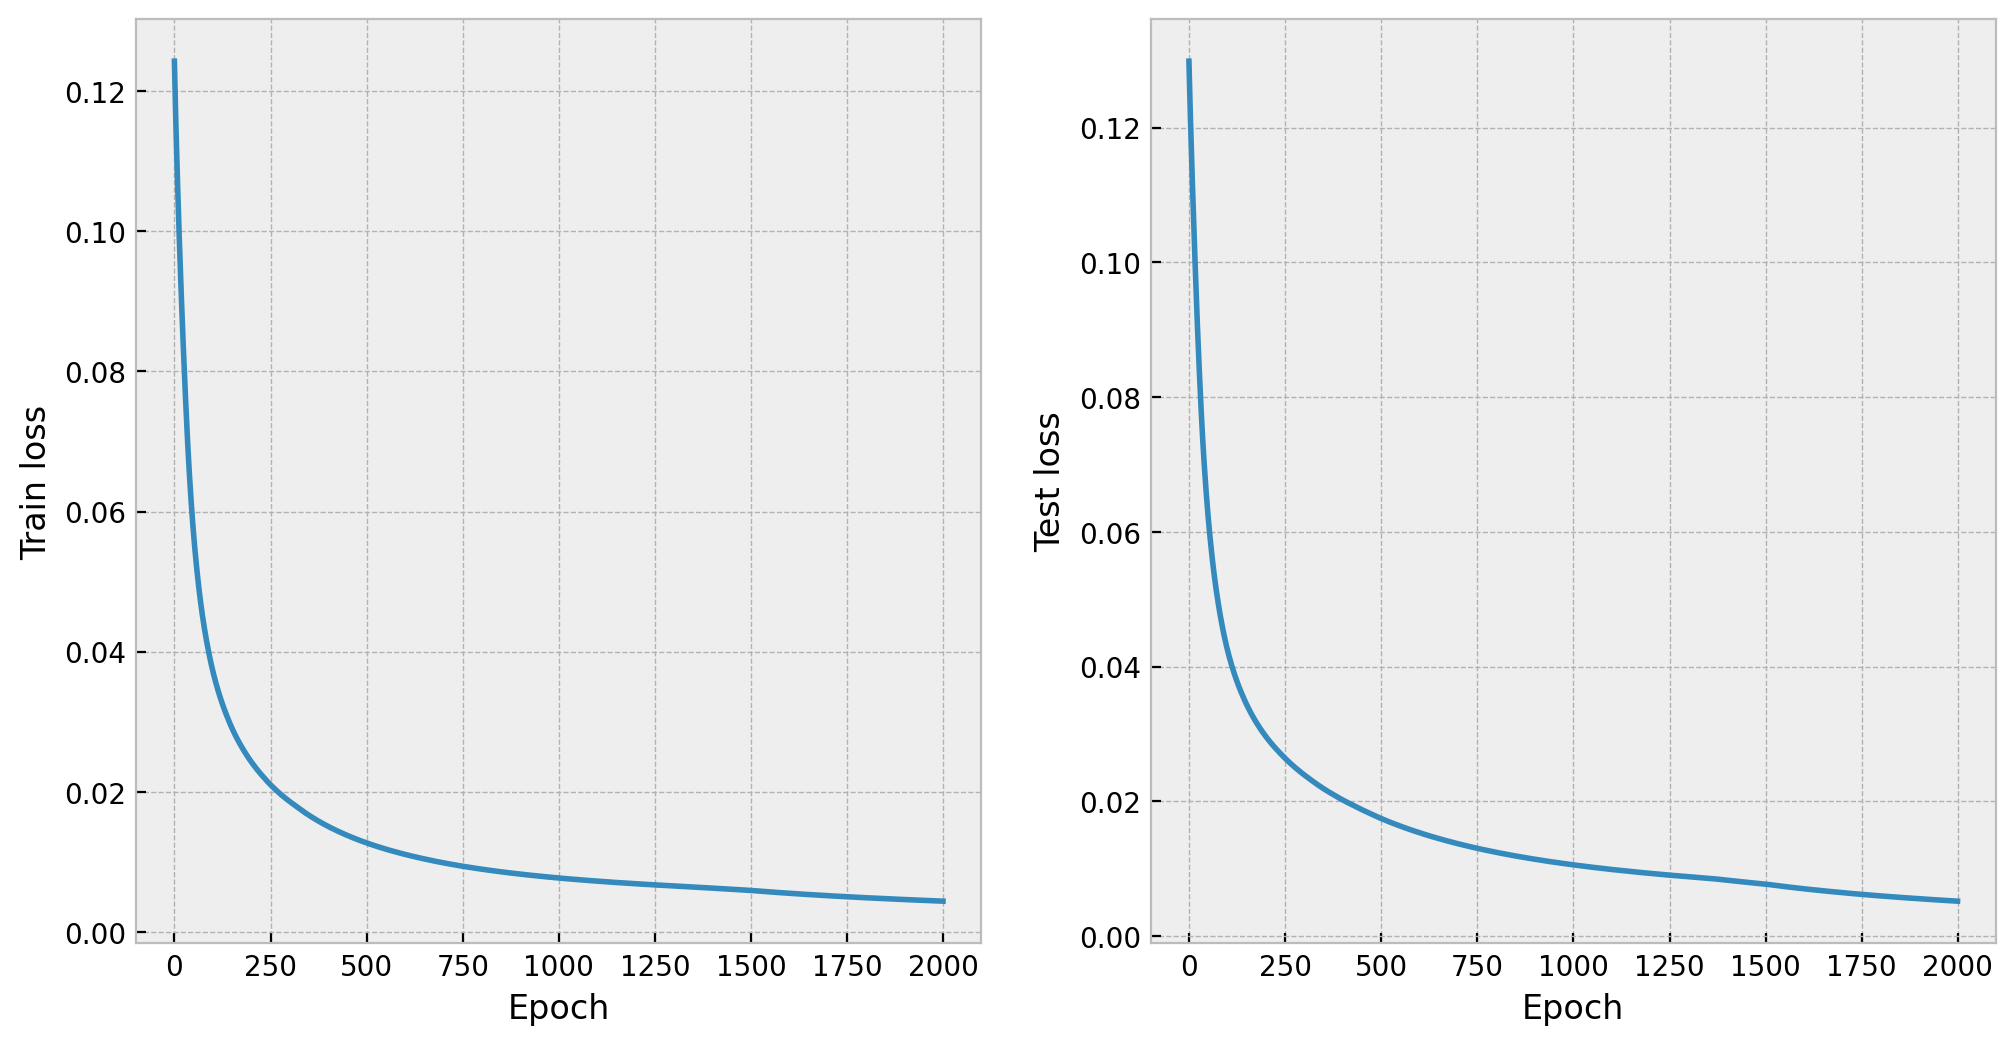

In [136]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.subplot(1, 2, 2)
plt.plot(test_loss)
plt.xlabel('Epoch')
plt.ylabel('Test loss');

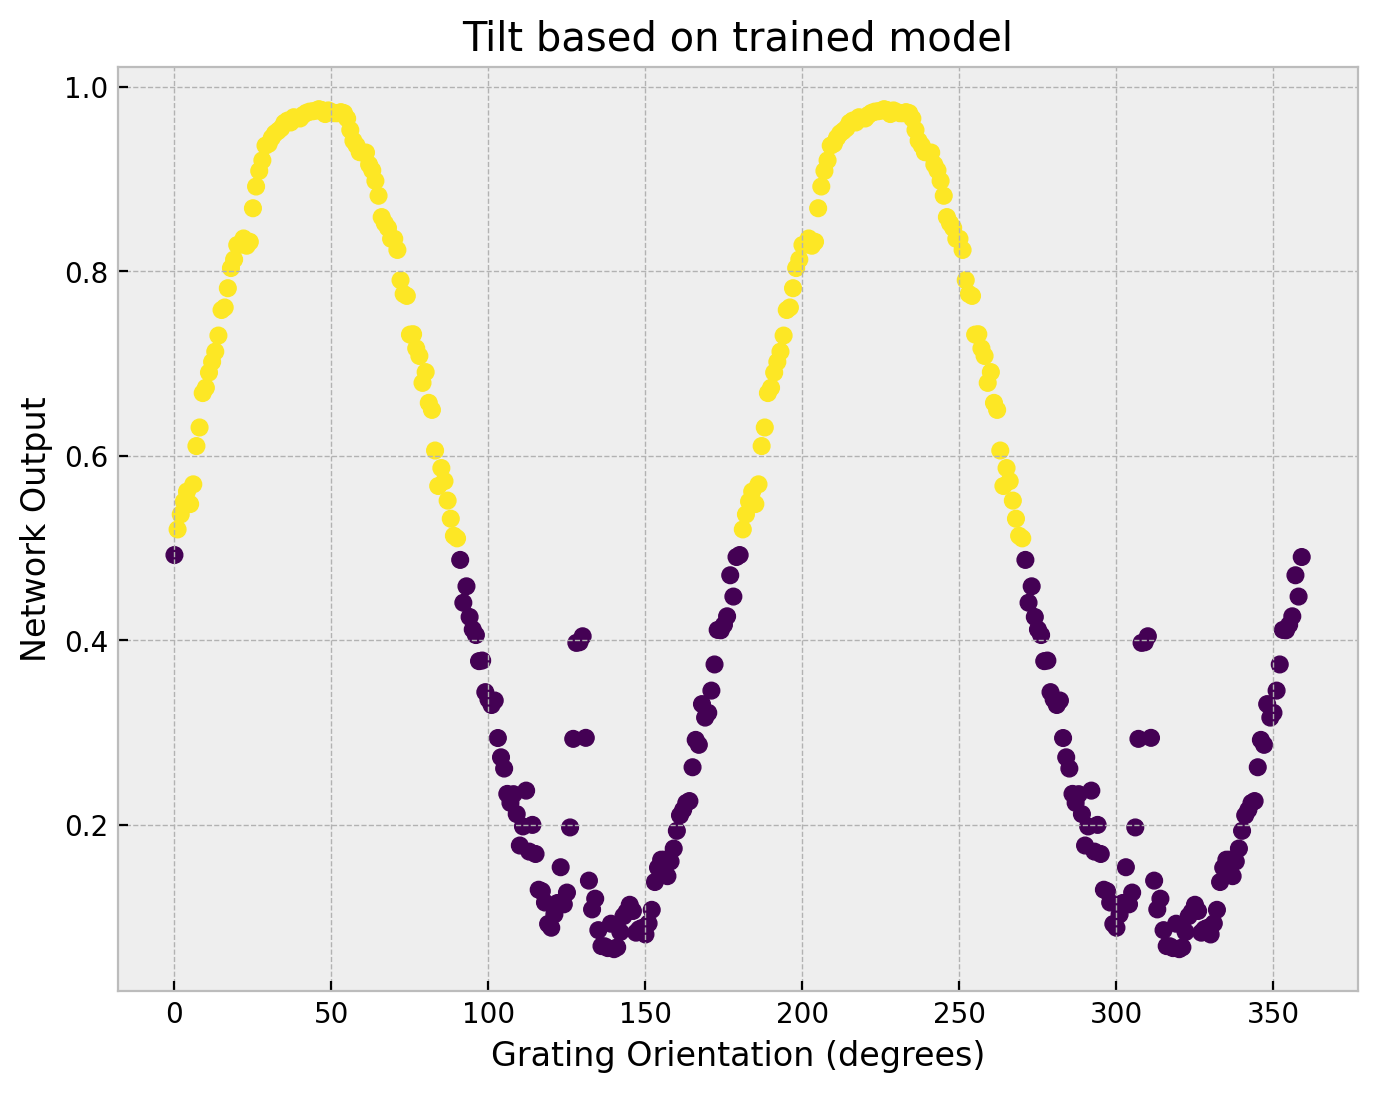

In [138]:
output = model(stimuli)
choice = output.detach().numpy() >= 0.5

plt.scatter(range(360), output.detach().numpy(), c=choice)
plt.xlabel('Grating Orientation (degrees)')
plt.ylabel('Network Output')
plt.title('Tilt based on trained model');

Load the data:

* `choices`: mouse chooses whether a Gabor stimulus is to the left or right on each of 276 trials 
* `spikes`: normalized spike rates for each of 691 neurons across the cortex recorded with Neuropixel probes on each trial

In [180]:
spikes = np.load('data/mouse_cortical_spiking.npy')
choices = np.load('data/mouse_left_right_choices.npy')

spikes.shape, choices.shape

((276, 691), (276,))

In [181]:
# 0 = left, 1 = right
choices[:9]

array([1., 1., 0., 0., 0., 0., 1., 0., 0.])

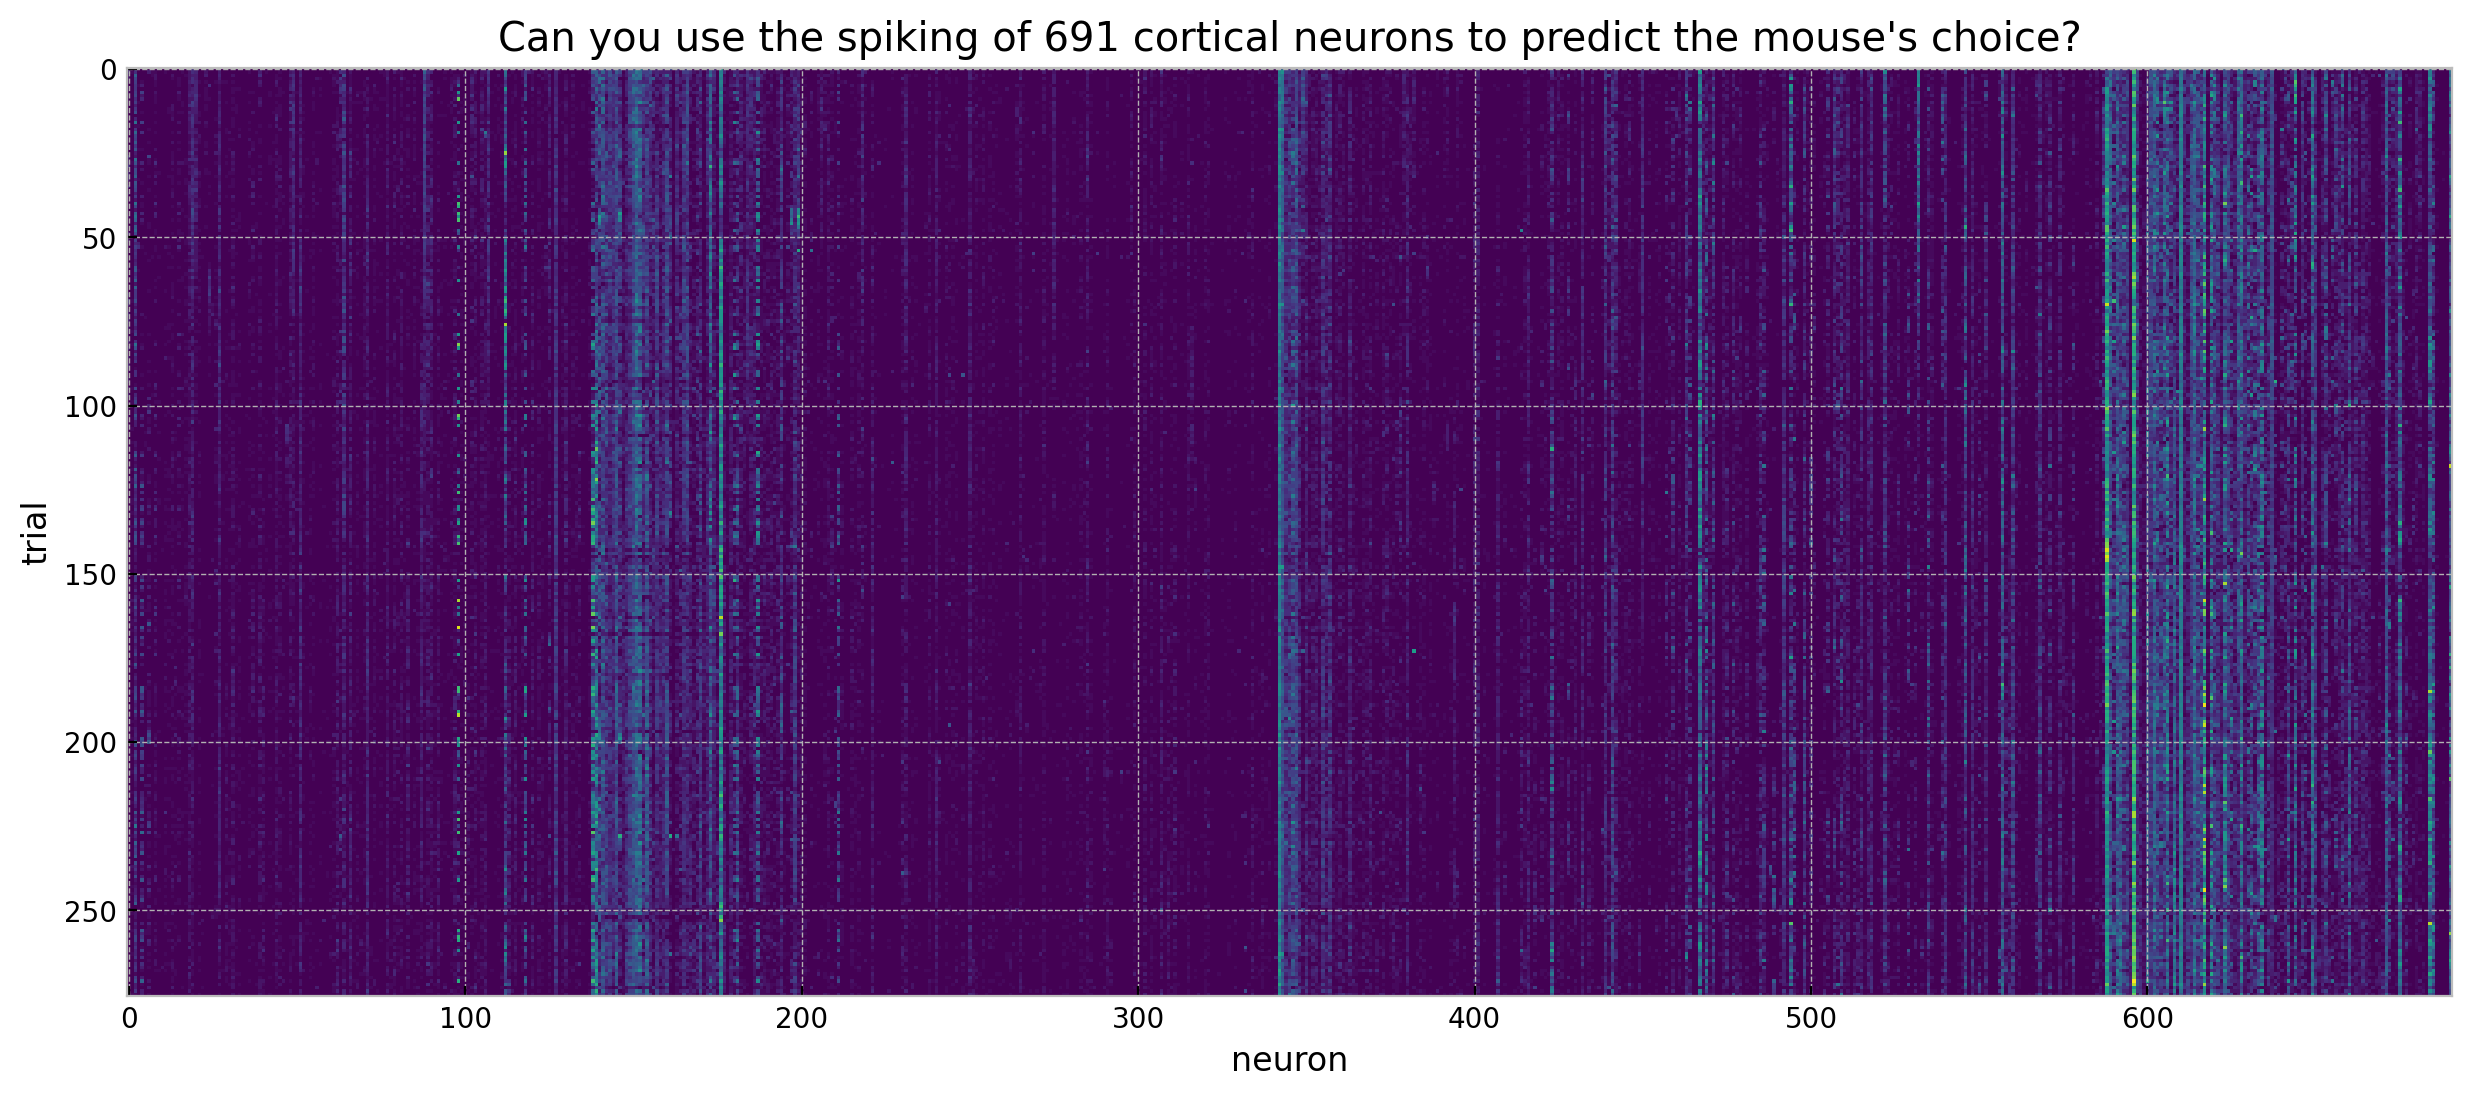

In [185]:
plt.figure(figsize=[15,8])
plt.imshow(spikes)
plt.xlabel('neuron')
plt.ylabel('trial')
plt.title("Can you use the spiking of 691 cortical neurons to predict the mouse's choice?");